# Exploratory Data Analysis: TSA Claims

## Latar Belakang
TSA Claims database merupakan data yang diperoleh dari Transportation Security Administration dari tahun 2002 hingga 2015. Dalam menganalisa data ini dapat melibatkan pengidentifikasian faktor-faktor yang berkontribusi terhadap jumlah klaim yang dibuat, memahami jenis klaim yang diajukan, dan menentukan hasil dari klaim tersebut (misalnya disetujui atau ditolak).

## Pernyataan Permasalahan

TSA ingin mengetahui apa permasalahan yang menyebabkan marak-nya pengajuan claim. 

**Bagaimana cara meningkatkan pelayanan sehingga dapat meminimalisir pengajuan claims?**
Pertanyaan pendukung:
- Bagaimana perkembangan jumlah klaim di tiap tahun?
- Apa status klaim terbanyak?
- Apa Claim Type terbanyak?
- Dimana lokasi paling sering terjadi?
- Airport mana saja yang menjadi tempat pengajuan klaim terbanyak?
- Airline mana saja yang menjadi tempat pengajuan klaim terbanyak?

## Data

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import normaltest
%matplotlib inline 

In [2]:
df = pd.read_csv('tsa_claims.csv')
df.head()

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_16908\1986668801.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


**Informasi Fitur/Kolom**  
Dataset berisikan informasi terkait pengajuan claim kepada TSA diantaranya adalah sebagai berikut:

1. Claim Number: Nomor Unik/Identitas Dari Claim.

2. Date Received: Waktu ketika pengajuan Claim diterima.

3. Incident Date: Waktu kejadian insiden.

4. Airport Code: Kode Airport / Kode unik dari bandara.

5. Airport Name: Nama bandara tempat kejadian insiden.

6. Airline Name: Nama Penerbangan yang bertanggung jawab atas kejadian.

7. Claim Type: Tipe Claim yang diajukan seperti kerusakan/kehilangan dll.

8. Claim Site: Lokasi kejadian insiden.

9. Item: Barang yang mengalami insiden.

10. Claim Amount: Jumlah uang yang ingin di claim.

11. Status: Status dari pengajuan Claim (Disetujui, ditolak dll).

12. Close Amount: Biaya yang dibayarkan.

13. Disposition: Hasil akhir dari pengajuan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


Dari informasi diatas dapat ditarik kesimpulan sebagai berikut:
* Total Data sebanyak 204.267 
* Tipe Data perlu diperbaiki, *Date Received, Incident Date* menjadi datetime, *Claim Amount, Close Amount* menjadi numeric (float/int)
* Terdapat banyak missing value di berbagai kolom, sehingga perlu diatasi dengan cara mengisi dengan mean/median/modus atau drop

## Data Manipulation
Data manipulasi, bertujuan untuk mengubah/memperbaiki data sehingga mudah untuk di intepretasikan. Pada notebook ini akan melakukan data manipulasi terhadap: 
* Tipe Data
* Outlier Data
* Missing Value
* Duplicate Data

### Tipe/Format Data

In [4]:
# baris code, untuk melihat tipe data serta nunique dari masing masing fitur/kolom
tipe=[]
jumlah=[]
sample=[]

for i in df.columns:
    sample.append(df[i].unique()[:3])
    jumlah.append(df[i].nunique())
    tipe.append(df[i].dtype)
   
pd.DataFrame({
    'kolom': df.columns,
    'dtype': tipe,
    'nunique': jumlah,
    'unique': sample
})

,kolom,dtype,nunique,unique
0,Claim Number,object,204258,"[0909802M, 0202417M, 0202445M]"
1,Date Received,object,4007,"[4-Jan-02, 2-Feb-02, 4-Feb-02]"
2,Incident Date,object,26807,"[12/12/2002 0:00, 1/16/2004 0:00, 11/26/2003 0..."
3,Airport Code,object,465,"[EWR, SEA, STL]"
4,Airport Name,object,485,"[Newark International Airport, Seattle-Tacoma ..."
5,Airline Name,object,318,"[Continental Airlines, nan, American Airlines]"
6,Claim Type,object,11,"[Property Damage, Passenger Property Loss, nan]"
7,Claim Site,object,6,"[Checkpoint, Checked Baggage, Other]"
8,Item,object,4704,"[Other, Luggage (all types including footlocke..."
9,Claim Amount,object,36117,"[$350.00 , $100.00 , $278.88 ]"


#### Date Received & Incident Date Format

In [5]:
#Format columns nicely for dataframe index
df.columns = [s.strip().replace(" ","_") for s in df.columns]

#Rename date columns
df["Date_Received_String"] = df.Date_Received
df["Incident_Date_String"] = df.Incident_Date
df.drop(["Date_Received","Incident_Date"], axis=1, inplace=True)

In [6]:
#Drop nulls
df.dropna(subset=["Date_Received_String"], inplace=True)

#Format datetime
df["Date_Received"] = pd.to_datetime(df.Date_Received_String,format="%d-%b-%y")

#Check year range
df = df[df.Date_Received.dt.year.isin(range(2002,2016))]

In [7]:
# regex untuk memperbaiki tipe data datetime sehingga menjadi format yang sama
month_dict = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

def format_dates(regex, date_string):
    m = regex.match(date_string)
    if(m):
        day, month, year = m.group(1,2,3)
        return "{}/{}/{}".format(month_dict[month],day,"20"+year)
    else:
        return date_string

In [8]:
#Drop nulls
df.dropna(subset=["Incident_Date_String"], inplace=True)

#Error correction for one value in Kaggle data set (looked up in original TSA data)
df.Incident_Date_String.replace("6/30/10","06/30/2010 16:30",inplace=True)

#String formatting for consistency
df["Incident_Date_String"] = df.Incident_Date_String.str.replace("-","/")
df["Incident_Date_String"] = df.Incident_Date_String.str.lower()

#Splitting up time (if exists otherwise will be date) and date components
df["Incident_Time"] = df.Incident_Date_String.str.split(" ").map(lambda x: x[-1])
df["Incident_Date"] = df.Incident_Date_String.str.split(" ").map(lambda x: x[0])

#Could not find a reasonable translation for these entries... most look like "02##"
regex = re.compile(r"/[a-z]{3}/[0-9]{4}")
df = df[df.Incident_Date.map(lambda x: not bool(regex.search(x)))].sort_values(["Date_Received"])

#These are entries received in 2014. Formatting is different from other years but internally consistent.
regex = re.compile(r"(\d*)/([a-z]{3})/(1[1-5])$")
df["Incident_Date"] = df.Incident_Date.map(lambda x: format_dates(regex,x) )

#Format datetime, check year range, create year and month
df["Incident_Date"] = pd.to_datetime(df.Incident_Date,format="%m/%d/%Y")
df = df[df.Incident_Date.dt.year.isin(range(2002,2016))]

df = df.drop(columns=['Incident_Date_String', 'Date_Received_String'], axis=1)

print(df.Incident_Date.dt.year.value_counts().sort_index())
print(len(df))

2002     2123
2003    24463
2004    28952
2005    22956
2006    18793
2007    18260
2008    15887
2009    11172
2010    12215
2011    10994
2012     9984
2013     9536
2014     8680
2015     7721
Name: Incident_Date, dtype: int64
201736


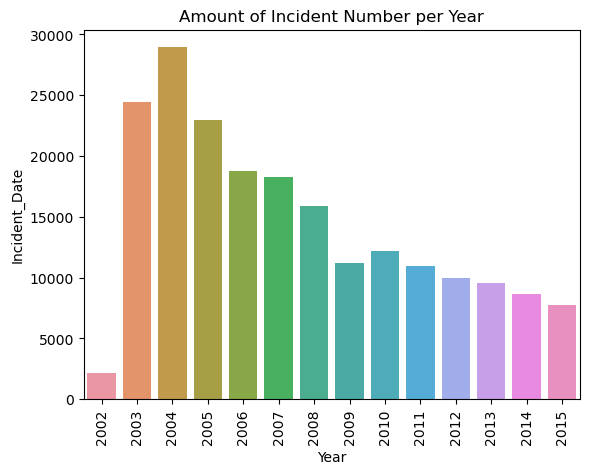

In [9]:
ax1 = sns.barplot(data=df.Incident_Date.dt.year.value_counts().sort_index().reset_index().rename(columns={'index': 'Year'}), x='Year', y ='Incident_Date')
plt.xticks(rotation=90)
plt.title('Amount of Incident Number per Year');

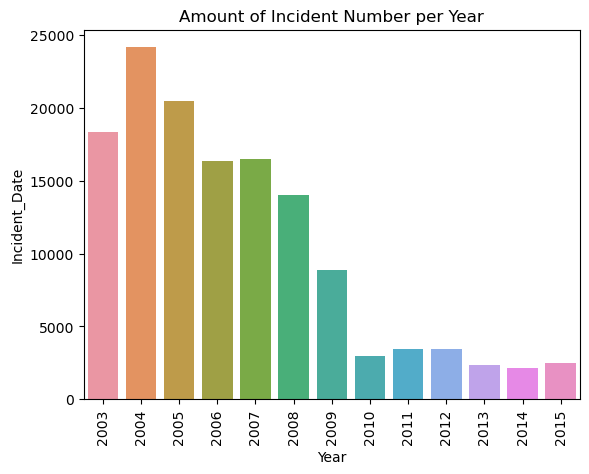

In [112]:
ax1 = sns.barplot(data=tsa.Incident_Date.dt.year.value_counts().sort_index().reset_index().rename(columns={'index': 'Year'}), x='Year', y ='Incident_Date')
plt.xticks(rotation=90)
plt.title('Amount of Incident Number per Year');

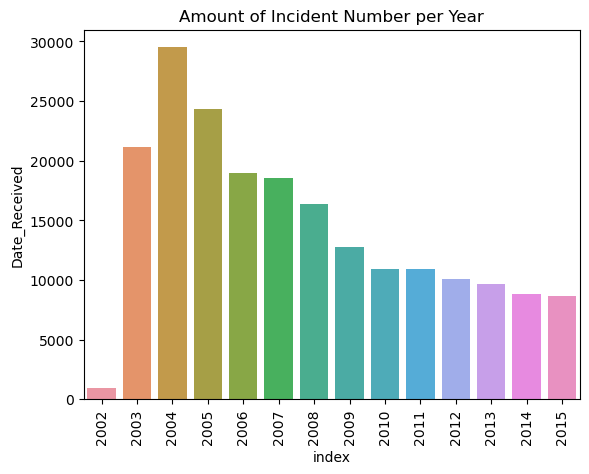

In [11]:
ax1 = sns.barplot(data=df.Date_Received.dt.year.value_counts().sort_index().reset_index().rename({'index': 'Year'}), x='index', y ='Date_Received')
plt.xticks(rotation=90)
plt.title('Amount of Incident Number per Year');

Dari kedua informasi diatas didapatkan bahwa pada tahun 2002 jumlah claim sangatlah sedikit, hal ini dikarenakan TSA memulai operasi pada 2002 akhir. Sehingga pada notebook ini akan memusatkan analisa pada tahun 2003-2015.

In [12]:
df = df[(df['Incident_Date'].dt.year != 2002) & (df['Date_Received'].dt.year != 2002)]
# memutuskan untuk menghapus data di tahun 2002, karena data sangat sedikit

#### Claim & Close Amount Formats

In [13]:
# Define a function to check if a string is numeric
def is_numeric(string):
    return re.match(r"^\d+\.\d+$", string) is not None

# Create a new column to store the result of the check
df['is_numeric'] = df['Claim_Amount'].apply(lambda x: is_numeric(str(x)))

# Filter the dataframe to only include the rows where the claim amount is not numeric
non_numeric_df = df[df['is_numeric'] == False]

# Get a list of the non-numeric values as strings
non_numeric_values = non_numeric_df['Claim_Amount'].apply(lambda x: str(x)).tolist()

# Concatenate all non-numeric values into a single string
non_numeric_string = ''.join(non_numeric_values)

# Get the value counts of each symbol
symbol_counts = pd.Series(list(non_numeric_string)).value_counts()

# print("Value counts of symbols:")
symbol_counts.reset_index().rename(columns={'index': 'Symbol', 0:'Amount'})

,Symbol,Amount
0,0,372373
1,$,184334
2,.,184334
3,,184334
4,1,71772
5,5,69193
6,9,63038
7,2,58866
8,3,43686
9,4,43196


Dari informasi diatas didapatkan bahwa, pada kolom *Claim Amount* dan *Close Amount* terdapata bilangan non numerik didalamnya, sehingga perlu dilakukan perbaikan sehingga tipe data dapat dikonversikan menjadi float/int.

In [14]:
df = df.drop(columns=["is_numeric"], axis=1)
len(df['Claim_Amount'])

199597

In [15]:
df['Claim_Amount'] = df['Claim_Amount'].str.strip().str.replace('$','').str.replace(';','').str.replace('-', '0.00')
df['Claim_Amount'].replace('0.00', np.nan, inplace=True)
df['Claim_Amount'] = df['Claim_Amount'].astype(float)

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_16908\332796347.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Claim_Amount'] = df['Claim_Amount'].str.strip().str.replace('$','').str.replace(';','').str.replace('-', '0.00')


In [16]:
df['Close_Amount'] = df['Close_Amount'].str.strip().str.replace('$','').str.replace(';','').str.replace('-', '0')
df['Close_Amount'] = df['Close_Amount'].astype(float)

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_16908\2063355734.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close_Amount'] = df['Close_Amount'].str.strip().str.replace('$','').str.replace(';','').str.replace('-', '0')


In [17]:
df[['Close_Amount', 'Claim_Amount']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199597 entries, 1090 to 204266
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Close_Amount  132314 non-null  float64
 1   Claim_Amount  155897 non-null  float64
dtypes: float64(2)
memory usage: 4.6 MB


Tipe data close amount dan juga claim amount telah diubah ke dalam bentuk numerik. Langkah selanjutnya adalah untuk mengisi data kosong yang berada di kedua fitur tersebut yang akan dijelaskan pada bagian missing value.

### Check Duplicate
Untuk melakukan analisa terhadap suatu data diperlukan cek duplikat dari sebuah data, apakah terdapat data yang duplikat atau tidak, untuk melakukan analisa terhadap duplikat data dengan menyimpan data terbaru dan membuang data yang lebih lama.

In [18]:
# # # Check for duplicate rows
duplicates = df[df.duplicated(subset='Claim_Number', keep=False)].sort_values('Claim_Number')

# # # Print the number of duplicate rows
print("Number of duplicate rows: ", len(duplicates))

# # Drop the duplicate rows (keep the last occurrence)
df.drop_duplicates(subset='Claim_Number', keep='last', inplace=True)

# # df[df.duplicated()]

Number of duplicate rows:  18


Terdapat 18 baris yang terduplikat, sehingga perlu diperbaiki dengan menyimpan data.

### Check Missing Values

In [19]:
# Replace '-' values with NaN values
df.replace("-", pd.np.nan, inplace=True)

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_16908\3354817664.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace("-", pd.np.nan, inplace=True)


<AxesSubplot:>

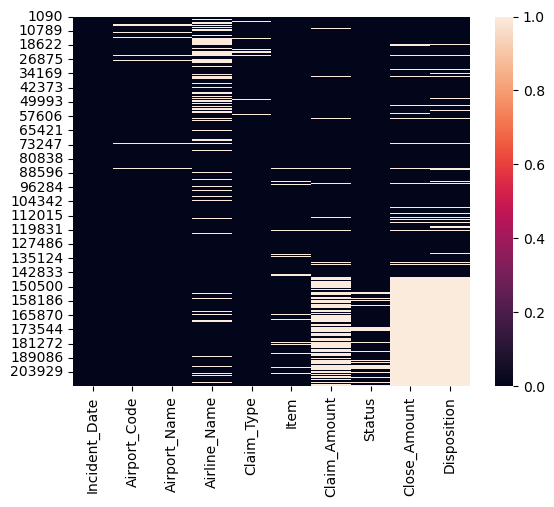

In [20]:
sns.heatmap(df[['Incident_Date','Airport_Code', 'Airport_Name', 'Airline_Name', 'Claim_Type', 'Item', 'Claim_Amount','Status', 'Close_Amount', 'Disposition']].isna())

In [21]:
len(df[df['Date_Received'].dt.year > 2010][['Close_Amount', 'Disposition']])

48186

Dari informasi diatas terlihat bahwa terdapat data yang hilang namun berkaitan dengan kolom/fitur lainnya, seperti Airport_Code dengan Airport_Name, lalu Claim_Amount dengan Close_Amount. Sedangkan untuk data Close_Amount dan Disposition dari 2010 hingga 2015 kehilangan data.

In [22]:
tsa = df.copy()

In [23]:
tsa.isna().sum()/len(tsa)*100

Claim_Number      0.000000
Airport_Code      3.622462
Airport_Name      3.622462
Airline_Name     17.878329
Claim_Type        3.053791
Claim_Site        0.404834
Item              4.067880
Claim_Amount     21.891096
Status            6.385153
Close_Amount     33.706435
Disposition      35.538710
Date_Received     0.000000
Incident_Time     0.000000
Incident_Date     0.000000
dtype: float64

In [24]:
# Calculate the number of missing values in each row
missing_values = tsa.isnull().sum(axis=1)

# Keep only the rows with less than 6 missing values
tsa = tsa[missing_values < 6]
tsa
# Reset the index
# tsa.reset_index(drop=True, inplace=True)

,Claim_Number,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition,Date_Received,Incident_Time,Incident_Date
1090,0616835L,EWR,Newark International Airport,NaN,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,90.0,Denied,0.0,Deny,2003-01-02,0:00,2003-12-02
1124,0105595M,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,150.0,Settled,75.0,Settle,2003-01-05,0:00,2003-12-15
1123,0105170M,ILM,Wilmington International,USAir,Passenger Property Loss,Checkpoint,Jewelry - Fine,250.0,Denied,0.0,Deny,2003-01-05,0:00,2003-12-12
1121,0105167M,LAX,Los Angeles International Airport,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,65.1,Approved,65.1,Approve in Full,2003-01-05,0:00,2003-09-14
1122,0105083M,NaN,NaN,Delta Air Lines,NaN,Checkpoint,Cell Phones,400.0,Denied,0.0,Deny,2003-01-05,0:00,2003-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198006,2016011328306,EWR,Newark International Airport,UAL,Property Damage,Checked Baggage,Home Decor; Household Items,NaN,NaN,NaN,NaN,2015-12-31,17/dec/15,2015-12-17
202721,2016011128249,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,10.0,Approve in Full,NaN,NaN,2015-12-31,18/oct/15,2015-10-18
202295,2015123128023,PDX,Portland International,NaN,Passenger Property Loss,Checked Baggage,Jewelry & Watches,NaN,NaN,NaN,NaN,2015-12-31,7/jun/15,2015-06-07
198960,2016011328297,ICT,Wichita Mid-Continent,Southwest Airlines,Passenger Property Loss,Checked Baggage,Office Equipment & Supplies,NaN,NaN,NaN,NaN,2015-12-31,8/dec/15,2015-12-08


Secara keseluruhan terdapat banyak missing value di dataset ini, sehingga untuk mempermudah dalam menganalisa dan juga memanipulasi data, maka baris yang memiliki 50% atau lebih missing value akan di drop.

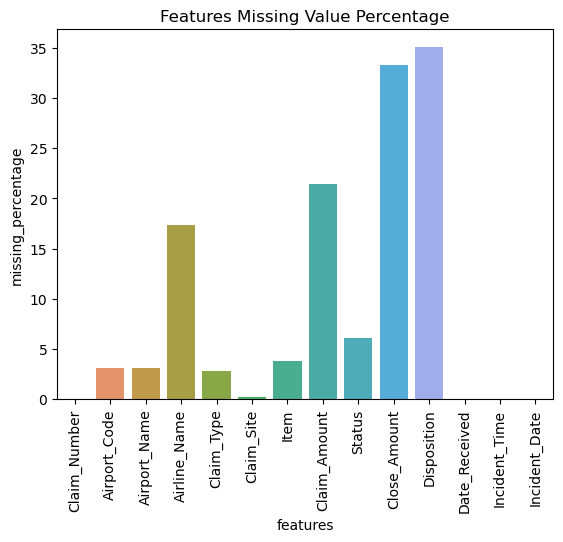

In [25]:
tsa_missing = tsa.isna().sum()/len(tsa)*100
tsa_missing.reset_index().rename(columns={'index': 'features', 0: 'missing_percentage'})
sns.barplot(data=tsa_missing.reset_index().rename(columns={'index': 'features', 0: 'missing_percentage'}), x='features', y= 'missing_percentage')
plt.xticks(rotation=90)
plt.title('Features Missing Value Percentage');


Dari informasi diatas terlihat bahwa data yang memiliki missing value tertinggi adalah kolom/fitur Close_Amount, Disposition, dan Claim_Amount

In [26]:
# Extract the year from the Claim Date column
tsa['Year'] = df['Incident_Date'].dt.year

# Group the data by year
grouped = tsa.groupby('Year')

# Loop through each group (year) and count the number of missing values in each column
for year, data in grouped:
    print("Year:", year)
    print(data.isnull().sum().sort_values(ascending=False)/len(data)*100)
    print("\n")

Year: 2003
Airline_Name     44.393006
Airport_Code     16.227834
Airport_Name     16.227834
Claim_Type       14.082586
Disposition       9.651552
Close_Amount      8.481792
Claim_Amount      2.413921
Item              0.425743
Claim_Site        0.037201
Claim_Number      0.000000
Status            0.000000
Date_Received     0.000000
Incident_Time     0.000000
Incident_Date     0.000000
Year              0.000000
dtype: float64


Year: 2004
Airline_Name     35.427659
Disposition       9.150236
Close_Amount      7.900583
Claim_Type        4.734796
Airport_Code      3.995418
Airport_Name      3.995418
Claim_Amount      1.718273
Item              1.221883
Claim_Site        0.319356
Claim_Number      0.000000
Status            0.000000
Date_Received     0.000000
Incident_Time     0.000000
Incident_Date     0.000000
Year              0.000000
dtype: float64


Year: 2005
Airline_Name     18.794559
Disposition       7.181910
Close_Amount      3.840266
Airport_Code      2.077593
Airport_Name   

Text(0.5, 1.0, 'Close Amount Missing Value by Year')

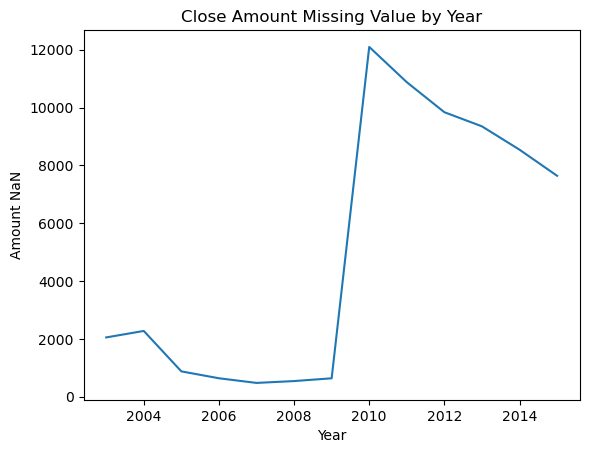

In [27]:
close_amount_isna = tsa[tsa['Close_Amount'].isna()].groupby('Year', as_index=False)['Claim_Number'].count().rename(columns={'Claim_Number': 'Amount NaN'})
sns.lineplot(data=close_amount_isna, x='Year', y='Amount NaN')
plt.title('Close Amount Missing Value by Year')

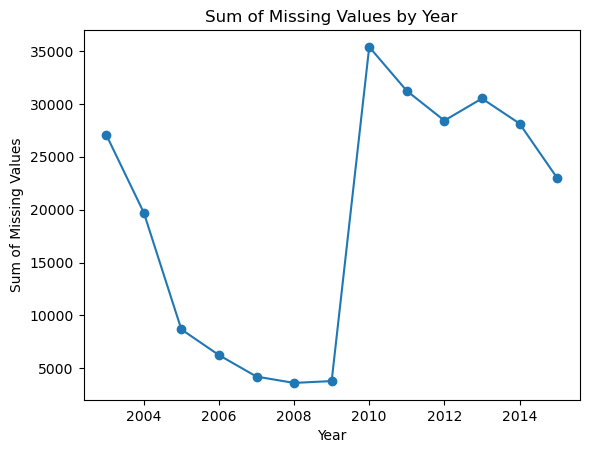

In [28]:
# Group the data by year and calculate the sum of missing values for each year
missing_values_by_year = tsa.groupby(by='Year').apply(lambda x: x.isna().sum().sum())

# Plot the sum of missing values by year
plt.plot(missing_values_by_year.index, missing_values_by_year.values, '-o')

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Sum of Missing Values')
plt.title('Sum of Missing Values by Year')

# Show the plot
plt.show()

Jika dilihat dari informasi diatas terjadi peningkatan missing value pada fitur Close Amount yang sangat signifikan, jika dibandingkan dengan tahun 2003-2009 yang hanya memiliki missing value < 10% berbeda pada tahun 2010-2015 dimana nilai missing value > 99% dari fitur Close Amount.

### Airport Code Missing Values Treats

In [29]:
tsa.Airport_Code.isna().sum()

6139

In [30]:
# Create new columns for Incident Month and Incident Year
tsa['Incident_Month'] = tsa['Incident_Date'].dt.month
tsa['Incident_Year'] = tsa['Incident_Date'].dt.year

# Group the data by Incident Year and Incident Month, and calculate the mode of Airport Code for each group
grouped = tsa.groupby(['Incident_Year', 'Incident_Month'])['Airport_Code'].agg(lambda x: x.mode().iloc[0])

# Use the groupby object to fill missing values in the Airport Code column
tsa['Airport_Code']=tsa['Airport_Code'].fillna(tsa.groupby(['Incident_Year', 'Incident_Month'])['Airport_Code'].transform(lambda x: x.mode().iloc[0]))

Nilai Airport_Code yang missing pada analisa ini di isi dengan menggunakan modus/data yang memiliki frekuensi yang tinggi di periode bulan dan tahun yang sama.

In [31]:
tsa['Airport_Code'].isna().sum()

0

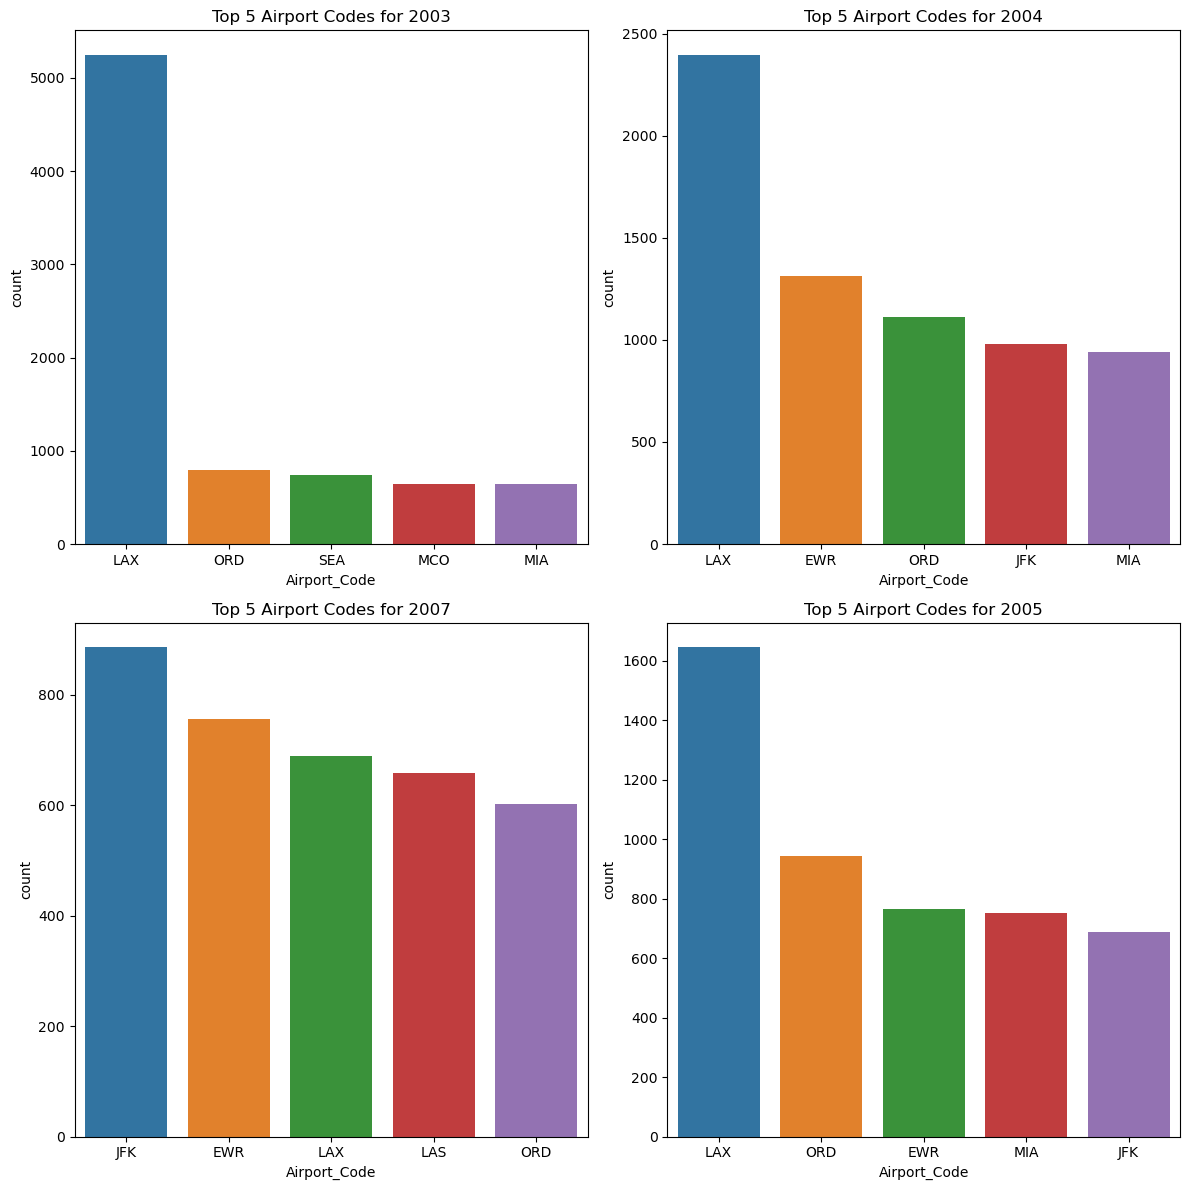

In [32]:
# create a list of unique years in your data
years = tsa['Year'].unique()

# create a figure with 4 subplots (for the top 4 years)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# flatten the 2d array of subplots into a 1d array
axs = axs.flatten()

# iterate over the years and plot a countplot for each year
for i, year in enumerate(years[:4]):
    # filter the data for the current year
    tsa_year = tsa[tsa['Year'] == year]
    
    # create a countplot of the top 5 airport codes for the current year
    ax = sns.countplot(x='Airport_Code', data=tsa_year, order=tsa_year['Airport_Code'].value_counts().iloc[:5].index, ax=axs[i])
    
    # set the title for the current subplot
    ax.set_title(f'Top 5 Airport Codes for {year}')
    
# adjust the spacing between the subplots
fig.tight_layout()

# show the plot
plt.show()

### Airport Name Missing Values Treats

In [33]:
tsa['Airport_Name'].isna().sum()

6139

In [34]:
# Create a dictionary that maps each unique Airport Code to its corresponding Airport Name
airport_codes = tsa.groupby('Airport_Code')['Airport_Name'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Use the dictionary to fill missing values in the Airport Name column
tsa['Airport_Name'] = tsa['Airport_Name'].fillna(tsa['Airport_Code'].map(airport_codes))

In [35]:
tsa.groupby('Airport_Code')['Airport_Name'].apply(lambda x: x.mode().iloc[0]).to_dict()

{'ABE': 'Lehigh Valley International Airport; Allentown',
 'ABI': 'Abilene Regional',
 'ABQ': 'Albuquerque International Sunport Airport',
 'ABR': 'Aberdeen Regional Airport',
 'ABY': 'Southwest Georgia Regional Airport ;Albany',
 'ACK': 'Nantucket Memorial Airport',
 'ACT': 'Waco Regional Airport',
 'ACV': 'Arcata-Eureka',
 'ACY': 'Atlantic City International',
 'ADK': 'Adak Mitchell Field Airport',
 'ADQ': 'Kodiak State Airport',
 'AEX': 'Alexandria International Airport',
 'AGS': 'Bush Field',
 'AHN': 'Athens/Ben Epps',
 'AIA': 'Alliance Municipal Airport',
 'AKN': 'King Salmon',
 'ALB': 'Albany International',
 'ALO': 'Waterloo Municipal Airport',
 'ALS': 'Alamosa-San Luis Valley Bergman Airport',
 'ALW': 'Walla Walla Regional Airport',
 'AMA': 'Rick Husband Amarillo International Airport',
 'ANC': 'Ted Stevens Anchorage International Airport',
 'AOO': 'Altoona Blair County',
 'APF': 'Naples Municipal Airport',
 'APN': 'Alpena County Regional Airport',
 'ART': 'Watertown Internatio

Untuk Missing Values pada airport name, di isi berdasarkan airport code.

In [36]:
tsa['Airport_Name'].isna().sum()

0

In [37]:
# Load the List of US Airports data into a Pandas DataFrame
df_airports = pd.read_csv("airports.csv")

# Keep only the airport codes in the List of US Airports
df_airports = df_airports[['IATA']]

# Merge the two DataFrames on the airport code column
tsa = pd.merge(tsa, df_airports, left_on='Airport_Code', right_on='IATA', how='inner')

# Drop the airport code column from the List of US Airports
tsa = tsa.drop(columns=['IATA'])

# https://www.kaggle.com/datasets/aravindram11/list-of-us-airports

Pada Airport Name, terdapat beberapa nama airport dengan airport code yang tidak ada di dalam list US Airports https://www.kaggle.com/datasets/aravindram11/list-of-us-airports sehingga untuk analisa tersebut akan menggunakan data airport name/code yang sesuai dengan list US Airports.

In [38]:
tsa.isna().sum()

Claim_Number          0
Airport_Code          0
Airport_Name          0
Airline_Name      33538
Claim_Type         5563
Claim_Site          413
Item               7192
Claim_Amount      41484
Status            11686
Close_Amount      64426
Disposition       68001
Date_Received         0
Incident_Time         0
Incident_Date         0
Year                  0
Incident_Month        0
Incident_Year         0
dtype: int64

### Airline Name Missing Values Treats

In [39]:
tsa['Airline_Name'].isna().sum()

33538

In [40]:
missing_val_airline_name = tsa[tsa['Airline_Name'].isna()].index

In [41]:
# Group the data by incident month and year
grouped = tsa.groupby(['Incident_Month', 'Incident_Year'])

# Fill missing values in the airline name based on the mode of airline name in the same group
tsa['Airline_Name'] = grouped['Airline_Name'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [42]:
tsa.iloc[missing_val_airline_name].head()

,Claim_Number,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition,Date_Received,Incident_Time,Incident_Date,Year,Incident_Month,Incident_Year
0,0616835L,EWR,Newark International Airport,American Airlines,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,90.00,Denied,0.0,Deny,2003-01-02,0:00,2003-12-02,2003,12,2003
1,26876,EWR,Newark International Airport,UAL,NaN,Other,Luggage (all types including footlockers),200.00,Canceled,NaN,NaN,2003-01-21,0:00,2003-01-10,2003,1,2003
2,0617644L,EWR,Newark International Airport,UAL,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,200.00,Approved,200.0,Approve in Full,2003-01-21,0:00,2003-01-10,2003,1,2003
4,0206027L,EWR,Newark International Airport,UAL,Property Damage,Checkpoint,Computer - Laptop,669.99,Approved,669.0,Approve in Full,2003-02-06,0:00,2003-01-07,2003,1,2003
9,0224007L,EWR,Newark International Airport,Delta Air Lines,Property Damage,Checkpoint,Cameras - Digital,4945.00,Settled,3790.0,Settle,2003-02-24,0:00,2003-02-11,2003,2,2003


In [43]:
tsa.Airline_Name.isna().sum()

0

Sama seperti pada airport code, missing value di Airline name juga akan di isi dengan modus penerbangan di bulan dan tahun yang sama.

### Claim Type Missing Values Treats

In [44]:
tsa.isna().sum()/len(tsa)*100

Claim_Number       0.000000
Airport_Code       0.000000
Airport_Name       0.000000
Airline_Name       0.000000
Claim_Type         2.856424
Claim_Site         0.212062
Item               3.692864
Claim_Amount      21.300718
Status             6.000390
Close_Amount      33.080707
Disposition       34.916356
Date_Received      0.000000
Incident_Time      0.000000
Incident_Date      0.000000
Year               0.000000
Incident_Month     0.000000
Incident_Year      0.000000
dtype: float64

Berdasarkan informasi diatas, terdapat 3 buah fitur/kolom yang memiliki missing value < 5%, maka dari itu ke 3 fitur tersebut akan di drop saja karena mengingat proporsi nya sangat kecil dan juga ke-3 fitur tersebut merupakan fitur yang dibutuhkan dalam melakukan anlisa.

In [45]:
tsa.Claim_Type.value_counts()

Passenger Property Loss    114303
Property Damage             72584
Personal Injury              1218
Employee Loss (MPCECA)        456
Passenger Theft               449
Motor Vehicle                 139
Complaint                      37
Wrongful Death                  2
Compliment                      2
Bus Terminal                    1
Name: Claim_Type, dtype: int64

In [46]:
tsa.dropna(subset=['Claim_Type'], inplace=True)

### Claim Site Missing Values Treats

In [47]:
tsa.isna().sum()

Claim_Number          0
Airport_Code          0
Airport_Name          0
Airline_Name          0
Claim_Type            0
Claim_Site          296
Item               7007
Claim_Amount      41215
Status            11649
Close_Amount      63890
Disposition       67367
Date_Received         0
Incident_Time         0
Incident_Date         0
Year                  0
Incident_Month        0
Incident_Year         0
dtype: int64

In [48]:
tsa.Claim_Site.value_counts()

Checked Baggage    150720
Checkpoint          37205
Other                 810
Motor Vehicle         144
Bus Station            16
Name: Claim_Site, dtype: int64

In [49]:
tsa.dropna(subset=['Claim_Site'], inplace=True)

### Item Missing Values Treats

In [50]:
tsa.isna().sum()/len(tsa)*100

Claim_Number       0.000000
Airport_Code       0.000000
Airport_Name       0.000000
Airline_Name       0.000000
Claim_Type         0.000000
Claim_Site         0.000000
Item               3.690939
Claim_Amount      21.769766
Status             6.149978
Close_Amount      33.758437
Disposition       35.593848
Date_Received      0.000000
Incident_Time      0.000000
Incident_Date      0.000000
Year               0.000000
Incident_Month     0.000000
Incident_Year      0.000000
dtype: float64

In [51]:
tsa.dropna(subset=['Item'], inplace=True)

In [52]:
tsa.Item.isna().sum()

0

In [53]:
#Isolating broadest item categories
#Items column is a text list of all item categories. Sub categories are inconsistent across years.
tsa_item = tsa.Item.str.split("-").map(lambda x: "" if type(x) == float else x[0])
tsa_item = tsa_item.str.split(r" \(").map(lambda x: x[0])
tsa_item = tsa_item.str.split(r" &").map(lambda x: x[0])
tsa_item = tsa_item.str.split(r"; ").map(lambda x: x[0])
tsa_item = tsa_item.str.strip()

# categories = df_item.value_counts()

#categories[[not bool(re.compile(";").search(x)) for x in categories.index]][0:]

# categories


tsa.Item = tsa_item.copy()
tsa_item.value_counts()

Other                 33930
Clothing              21784
Luggage               17552
Jewelry               14718
Computer              14054
                      ...  
Furs                      1
Stenotype Machines        1
Ladders                   1
Typewriters               1
Knives                    1
Name: Item, Length: 120, dtype: int64

In [54]:
tsa.Item.unique()

array(['Clothing', 'Other', 'Computer', 'Locks', 'Cameras', 'Luggage',
       'Jewelry', 'Stereo Items', 'Fish/Game', 'Eyeglasses',
       'Cell Phones', 'Cosmetics', 'Currency', 'PDA', 'DVD/CD Players',
       'Baby', 'Musical Instruments', 'Photographic Film', 'Medicines',
       'Camping Equipment', 'Bedding', 'Binoculars', 'Razors', 'Bags',
       'MP3 Players', 'Audio', 'Electrical and Gas Appliances Minor',
       'Toys', 'Alcoholic beverages', 'Medical Equipment',
       'Desk and Writing Equipment', 'Video Recordings', 'Scissors',
       'Paintings and Pictures', 'Sporting Equipment', 'Watches',
       'Dishes', 'Kitchen Utensils', 'Tools',
       'Dental Equipment and Instruments', 'Ceramics', 'GPS', 'Cards',
       'Knick Knacks', 'Batteries', 'Barber Supplies', 'Books',
       'Handbags', 'Firearms', 'Automobile Parts', 'Candles',
       'Briefcases', 'Professional Equipment', 'Boxes', 'Sewing Machines',
       'Lighting Supplies', 'Calculators', 'Hearing Aids',
       'Game

In [55]:
# # Define the function to categorize the items
def categorize_item(item):
    if item in ["Cell Phones", "PDA", "DVD/CD Players", "MP3 Players", "Audio", "Electrical and Gas Appliances Minor", "Personal Electronics", "Audio/Video"]:
        return "Electronics"
    elif item in ["Clothing", "Jewelry", "Eyeglasses", "Cosmetics", "Bags", "Handbags", "Luggage", "Travel Accessories", "Personal Accessories", "Bedding", "Umbrellas"]:
        return "Clothing and Accessories"
    elif item in ["Cameras", "Stereo Items", "Musical Instruments", "Baby", "Desk and Writing Equipment", "Toys", "Alcoholic beverages", "Medical Equipment", "Candles", "Lighting Supplies", "Hearing Aids", "Batteries", "Clocks", "Telephones", "Home Decor", "Food", "Household Items", "Office Equipment", "Briefcases", "Mirrors", "Decorations", "TV Trays", "Artificial Flowers", "Furniture", "Lampshade", "Office Furnishings", "Wigs", "Baskets", "Crafting", "Tool Chests", "Computer peripherals", "Stationery", "Material", "Silverplate", "Linens", "Food items", "Electric Blankets", "Sunglasses", "Barbecue Grills", "Curtains", "Wedding Gowns", "Stuffed Animals", "Taxidermy Items", "House Keeping Items", "Outdoor Structures"]:
        return "Home Goods"
    elif item in ["Medicines", "Razors", "Dental Equipment and Instruments", "Calculators", "Compasses", "Bathroom Scales", "Electric Blankets", "Sunglasses"]:
        return "Personal Health and Beauty"
    elif item in ["Camping Equipment", "Binoculars", "Sporting Equipment", "Watches", "Game Equipment", "Bicycles", "Lighters", "Boxes", "Posters", "Lamps", "Microscopes", "Garden Equipment", "Brushes", "Boating Equipment", "Ladders", "Stenotype Machines"]:
        return "Sports and Outdoor"
    elif item in ["Paintings and Pictures", "Knick Knacks", "Barber Supplies", "Books", "Flashlights", "Personal Navigation", "Dolls", "Drafting", "Furs", "Typewriters"]:
        return "Art and Hobbies"
    elif item in ["Locks", "GPS", "Cards"]:
        return "Security"
    else:
        return "Other"

# # Apply the function to the "Item" column and create the "item_category" column
tsa["Item_Category"] = tsa["Item"].apply(categorize_item)

In [56]:
tsa['Item_Category'].value_counts()

Clothing and Accessories      71691
Other                         63966
Home Goods                    20341
Security                      10457
Electronics                    9215
Sports and Outdoor             3755
Art and Hobbies                1296
Personal Health and Beauty     1202
Name: Item_Category, dtype: int64

# Status

In [57]:
df.Status.value_counts()

Denied                                                                                                                           67424
Approved                                                                                                                         33955
Deny                                                                                                                             28237
Settled                                                                                                                          27216
Approve in Full                                                                                                                  12364
Canceled                                                                                                                          5959
Settle                                                                                                                            5766
Insufficient; one of the following items required: sum 

Pada fitur/kolom status memiliki unique value yang memiliki arti yang sama, sehingga untuk mempermudah intepretasi maka akan dibuat hanya menjadi 3 status utama yakni: Approved, Deny, dan Settled

In [58]:
tsa['Status'].replace('Deny', 'Denied', inplace=True)
tsa['Status'].replace('Approve in Full', 'Approved', inplace=True)
tsa['Status'].replace('Settle', 'Settled', inplace=True)
tsa['Status'].value_counts()

Denied                                                                                                                           88547
Approved                                                                                                                         42968
Settled                                                                                                                          30255
Canceled                                                                                                                          5142
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     3659
Closed as a contractor claim                                                                                                       966
In litigation                                                                                                                       57
In review                                              

In [59]:
# menghapus baris dengan status yang tidak valid
valid_status = ['Denied', 'Approved', 'Settled']
tsa = tsa[tsa['Status'].isin(valid_status)]
tsa['Status'].value_counts()

Denied      88547
Approved    42968
Settled     30255
Name: Status, dtype: int64

In [60]:
tsa.isna().sum()

Claim_Number          0
Airport_Code          0
Airport_Name          0
Airline_Name          0
Claim_Type            0
Claim_Site            0
Item                  0
Claim_Amount      26230
Status                0
Close_Amount      43954
Disposition       42766
Date_Received         0
Incident_Time         0
Incident_Date         0
Year                  0
Incident_Month        0
Incident_Year         0
Item_Category         0
dtype: int64

# Disposition

In [61]:
tsa['Disposition'].value_counts()

Deny               62538
Approve in Full    31623
Settle             24843
Name: Disposition, dtype: int64

In [62]:
tsa[tsa['Disposition'].isna()]

,Claim_Number,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition,Date_Received,Incident_Time,Incident_Date,Year,Incident_Month,Incident_Year,Item_Category
642,2004051552320,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing,250.00,Denied,NaN,NaN,2004-03-24,0:00,2004-01-25,2004,1,2004,Clothing and Accessories
2746,2006042405005,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Luggage,7.95,Denied,NaN,NaN,2006-04-17,0:00,2006-04-02,2006,4,2006,Clothing and Accessories
5055,2010010867325,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,Denied,NaN,NaN,2010-01-06,0:00,2010-01-03,2010,1,2010,Other
5056,2010011367493,EWR,Newark International Airport,USAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,NaN,Denied,NaN,NaN,2010-01-08,11:00,2010-01-05,2010,1,2010,Other
5057,2010011367537,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing,NaN,Denied,NaN,NaN,2010-01-08,6:30,2010-01-04,2010,1,2010,Clothing and Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194743,2015070623667,GRI,Central Nebraska Regional,Southwest Airlines,Property Damage,Checkpoint,Baggage/Cases/Purses,55.00,Approved,NaN,NaN,2015-06-26,10/apr/15,2015-04-10,2015,4,2015,Other
194744,2015083125175,GRI,Central Nebraska Regional,American Eagle,Property Damage,Checked Baggage,Clothing,NaN,Denied,NaN,NaN,2015-08-24,30/jul/15,2015-07-30,2015,7,2015,Clothing and Accessories
194745,2012020390611,DIK,Dickinson Theodore Roosevelt Regional Airport,UAL,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,Denied,NaN,NaN,2011-12-22,0:00,2011-12-06,2011,12,2011,Other
194750,2015072424222,SCE,University Park Airport- State College,Delta Air Lines,Property Damage,Checked Baggage,Food,24.90,Approved,NaN,NaN,2015-07-20,13/jul/15,2015-07-13,2015,7,2015,Home Goods


### Claim Amounts Missing Value Treats

<AxesSubplot:>

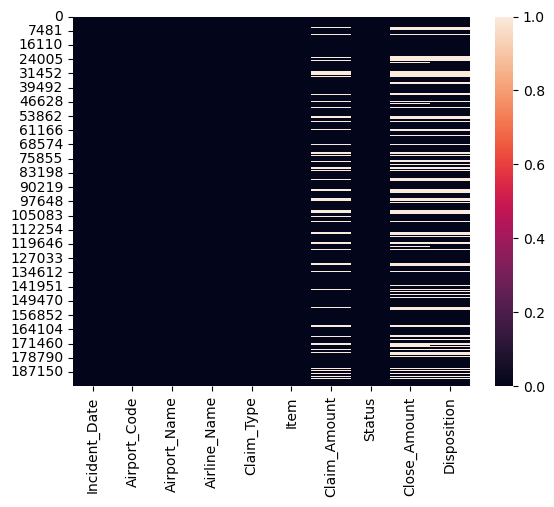

In [63]:
sns.heatmap(tsa[['Incident_Date','Airport_Code', 'Airport_Name', 'Airline_Name', 'Claim_Type', 'Item', 'Claim_Amount', 'Status', 'Close_Amount', 'Disposition']].isna())

C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


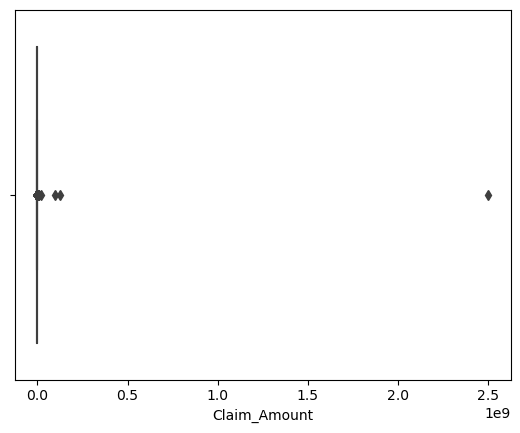

In [64]:
sns.boxplot(tsa['Claim_Amount']);

C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


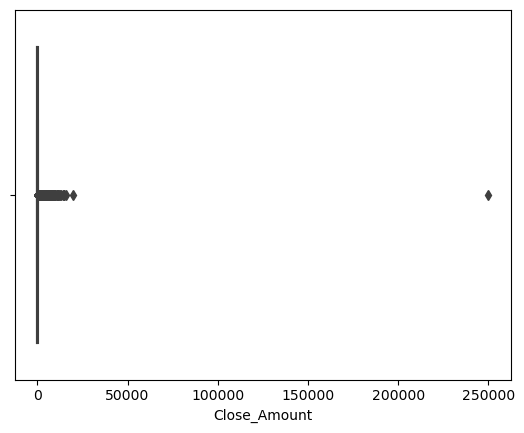

In [65]:
ax = sns.boxplot(tsa['Close_Amount']);

terlihat bahwa secara statistik claim amount dan close amount tidak terdistribusi secara normal.

### Deal with outlier

In [66]:
tsa[tsa['Status']=='Approved']['Claim_Amount'].describe()

count    42906.000000
mean       146.526712
std        321.156125
min          1.000000
25%         26.775000
50%         60.995000
75%        149.990000
max      13060.000000
Name: Claim_Amount, dtype: float64

In [67]:
len(tsa[tsa['Claim_Amount'] > 13060])/len(tsa)*100

0.27260926006057984

karena pada data ini memiliki banyak outlier yang sangat signifikan, maka untuk mempermudah analisa, untuk nilai claim amount akan mengikuti rentang. Hal ini dikarenakan dengan proporsi nilai claim amount yang melebihi nilai maks dari claim amount yang disetujui hanya sebesar 0.27 % dari total data.

In [68]:
tsa = tsa[tsa['Claim_Amount'] < tsa['Claim_Amount'].max()]

In [69]:
tsa['Claim_Amount'] = np.where(((tsa['Claim_Amount'].isnull()) & (tsa['Status'] == 'Approved') & (tsa['Close_Amount'] > 0)), tsa['Close_Amount'], tsa['Claim_Amount'])

In [70]:
np.where(((tsa['Claim_Amount'].isnull()) & (tsa['Status'] == 'Deny') & (tsa['Close_Amount'] > 0)), tsa['Close_Amount'], tsa['Claim_Amount'])

array([ 90.  , 200.  , 120.  , ..., 383.23,  55.  ,  24.9 ])

In [71]:
settled = tsa[(tsa['Claim_Amount'] > 0) & (tsa['Status'] == 'Settled') & (tsa['Close_Amount']>0)]
(settled['Close_Amount']/settled['Claim_Amount']*100).describe()

count    24777.000000
mean        51.449065
std         28.605297
min          0.540859
25%         44.999789
50%         50.000000
75%         55.333333
max       3416.333333
dtype: float64

Dari informasi diatas didapatkan bahwa pada status settled, dengan claim amount NaN namun nilai close amount > 0 cukup banyak. Maka data NaN pada Claim Amount akan diisikan oleh nilai median dari Claim Amount ketika status settled dan juga close amount >0.

In [72]:
tsa['Claim_Amount'] = np.where(((tsa['Claim_Amount'].isnull()) & (tsa['Status'] == 'Settled') & (tsa['Close_Amount'] > 0)), tsa['Close_Amount']*2, tsa['Claim_Amount'])
tsa['Close_Amount'] = np.where(((tsa['Close_Amount'].isnull()) & (tsa['Status'] == 'Settled') & (tsa['Claim_Amount'] > 0)), tsa['Claim_Amount']*0.5, tsa['Close_Amount'])

In [73]:
tsa.loc[(tsa['Status'] == 'Denied') & (tsa['Close_Amount']>0) ].head()

,Claim_Number,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition,Date_Received,Incident_Time,Incident_Date,Year,Incident_Month,Incident_Year,Item_Category
27,0328050L,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Luggage,75.00,Denied,75.00,Deny,2003-03-28,0:00,2003-03-17,2003,3,2003,Clothing and Accessories
32,0407016L,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checkpoint,Jewelry,11275.00,Denied,11275.00,Deny,2003-04-07,0:00,2003-02-14,2003,2,2003,Clothing and Accessories
43,0421001L,EWR,Newark International Airport,UAL,Property Damage,Checked Baggage,Locks,168.00,Denied,168.00,Deny,2003-04-21,0:00,2003-04-09,2003,4,2003,Security
51,0428109L,EWR,Newark International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Computer,2000.00,Denied,2000.00,Deny,2003-04-28,0:00,2003-03-14,2003,3,2003,Other
67,0527028L,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Fish/Game,569.91,Denied,569.91,Deny,2003-05-27,0:00,2003-05-18,2003,5,2003,Other


In [74]:
# tsa[tsa['Status']=='Denied']['Claim_Amount'] = tsa[tsa['Status']=='Denied']['Claim_Amount'].fillna(0)
tsa['Claim_Amount'].loc[tsa['Status'] == 'Denied'] = tsa['Claim_Amount'].loc[tsa['Status'] == 'Denied'].fillna(0)
tsa['Close_Amount'].loc[tsa['Status'] == 'Denied'] = tsa['Close_Amount'].loc[tsa['Status'] == 'Denied'].fillna(0)

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_16908\287480118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa['Claim_Amount'].loc[tsa['Status'] == 'Denied'] = tsa['Claim_Amount'].loc[tsa['Status'] == 'Denied'].fillna(0)
C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_16908\287480118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa['Close_Amount'].loc[tsa['Status'] == 'Denied'] = tsa['Close_Amount'].loc[tsa['Status'] == 'Denied'].fillna(0)


Karena terdapat Anomali pada data dengan status Denied namun nilai Close Amount > 0, maka perlu dilakukan manipulasi data dengan mengisi nilai Close Amount menjadi 0 ketika status Denied/Deny.

In [75]:
tsa.isna().sum()

Claim_Number          0
Airport_Code          0
Airport_Name          0
Airline_Name          0
Claim_Type            0
Claim_Site            0
Item                  0
Claim_Amount          0
Status                0
Close_Amount      11423
Disposition       16792
Date_Received         0
Incident_Time         0
Incident_Date         0
Year                  0
Incident_Month        0
Incident_Year         0
Item_Category         0
dtype: int64

In [76]:
# tsa.dropna(subset=['Claim_Amount'], inplace=True)

In [77]:
tsa.isna().sum()/len(tsa)*100

Claim_Number       0.000000
Airport_Code       0.000000
Airport_Name       0.000000
Airline_Name       0.000000
Claim_Type         0.000000
Claim_Site         0.000000
Item               0.000000
Claim_Amount       0.000000
Status             0.000000
Close_Amount       8.427833
Disposition       12.389054
Date_Received      0.000000
Incident_Time      0.000000
Incident_Date      0.000000
Year               0.000000
Incident_Month     0.000000
Incident_Year      0.000000
Item_Category      0.000000
dtype: float64

In [78]:
tsa[tsa['Close_Amount'].isna()]['Status'].value_counts()

Approved    11423
Name: Status, dtype: int64

In [79]:
tsa['Close_Amount'] = tsa['Close_Amount'].fillna(tsa['Claim_Amount'])

In [80]:
# Denied Close_Amount = 0
tsa.loc[tsa['Status']=='Denied', 'Close_Amount'] = 0

In [81]:
tsa[tsa['Status']=='Denied']

,Claim_Number,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition,Date_Received,Incident_Time,Incident_Date,Year,Incident_Month,Incident_Year,Item_Category
0,0616835L,EWR,Newark International Airport,American Airlines,Property Damage,Checkpoint,Clothing,90.00,Denied,0.0,Deny,2003-01-02,0:00,2003-12-02,2003,12,2003,Clothing and Accessories
3,0123015L,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,120.00,Denied,0.0,Deny,2003-01-23,0:00,2003-01-02,2003,1,2003,Other
8,0212023L,EWR,Newark International Airport,UAL,Property Damage,Checked Baggage,Locks,100.00,Denied,0.0,Deny,2003-02-12,0:00,2003-01-24,2003,1,2003,Security
10,0225107L,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,1982.66,Denied,0.0,Deny,2003-02-25,0:00,2003-02-02,2003,2,2003,Other
11,0227029L,EWR,Newark International Airport,Delta Air Lines,Property Damage,Checked Baggage,Luggage,241.00,Denied,0.0,Deny,2003-02-27,0:00,2003-02-04,2003,2,2003,Clothing and Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194656,2008071646974,PPG,Pago Pago-American Samoa,Hawaiian Airlines,Passenger Property Loss,Checked Baggage,Sporting Equipment,85.95,Denied,0.0,Deny,2008-07-09,0:00,2008-06-26,2008,6,2008,Sports and Outdoor
194658,2009112565735,DVL,Devils Lake Municipal Airport; Knoke Field,Northwest Airlines,Passenger Property Loss,Checked Baggage,Umbrellas,5.25,Denied,0.0,Deny,2009-11-12,13:50,2009-09-26,2009,9,2009,Clothing and Accessories
194660,2008111052148,HYA,Barnstable Municipal; Hyannis,Jet Blue,Passenger Property Loss,Checked Baggage,Locks,17.50,Denied,0.0,Deny,2008-11-05,0:00,2008-10-31,2008,10,2008,Security
194661,2009093064160,HYA,Barnstable Municipal; Hyannis,Cape Air,Passenger Property Loss,Checked Baggage,Cameras,798.75,Denied,0.0,Deny,2009-09-23,0:00,2009-09-01,2009,9,2009,Home Goods


In [82]:
tsa.isna().sum()

Claim_Number          0
Airport_Code          0
Airport_Name          0
Airline_Name          0
Claim_Type            0
Claim_Site            0
Item                  0
Claim_Amount          0
Status                0
Close_Amount          0
Disposition       16792
Date_Received         0
Incident_Time         0
Incident_Date         0
Year                  0
Incident_Month        0
Incident_Year         0
Item_Category         0
dtype: int64

## Disposition

In [83]:
tsa['Disposition'].value_counts()

Deny               62408
Approve in Full    31561
Settle             24778
Name: Disposition, dtype: int64

In [84]:
tsa['Disposition'].isna().sum()

16792

<AxesSubplot:>

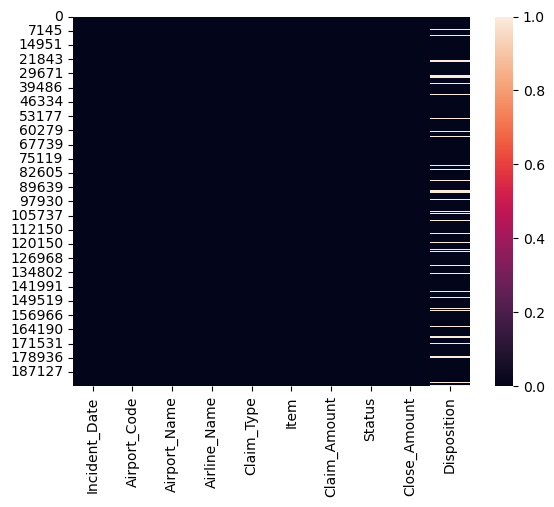

In [85]:
sns.heatmap(tsa[['Incident_Date','Airport_Code', 'Airport_Name', 'Airline_Name', 'Claim_Type', 'Item', 'Claim_Amount', 'Status', 'Close_Amount', 'Disposition']].isna())

In [86]:
tsa.isna().sum()

Claim_Number          0
Airport_Code          0
Airport_Name          0
Airline_Name          0
Claim_Type            0
Claim_Site            0
Item                  0
Claim_Amount          0
Status                0
Close_Amount          0
Disposition       16792
Date_Received         0
Incident_Time         0
Incident_Date         0
Year                  0
Incident_Month        0
Incident_Year         0
Item_Category         0
dtype: int64

In [87]:
tsa.columns

Index(['Claim_Number', 'Airport_Code', 'Airport_Name', 'Airline_Name',
       'Claim_Type', 'Claim_Site', 'Item', 'Claim_Amount', 'Status',
       'Close_Amount', 'Disposition', 'Date_Received', 'Incident_Time',
       'Incident_Date', 'Year', 'Incident_Month', 'Incident_Year',
       'Item_Category'],
      dtype='object')

Karena terlalu banyak missing value yang cukup random pada kolom Disposition maka kolom tersebut tidak akan di ikut sertakan dalam analisa kali ini.

In [88]:
final = tsa[['Claim_Number','Date_Received',
       'Incident_Date','Airport_Code', 'Airport_Name', 'Airline_Name',
       'Claim_Type', 'Claim_Site', 'Item', 'Item_Category', 'Claim_Amount', 'Status',
       'Close_Amount' ]].sort_values('Date_Received').reset_index()

In [89]:
final = final.drop(columns='index')
final

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Item_Category,Claim_Amount,Status,Close_Amount
0,0616835L,2003-01-02,2003-12-02,EWR,Newark International Airport,American Airlines,Property Damage,Checkpoint,Clothing,Clothing and Accessories,90.00,Denied,0.000
1,0105167M,2003-01-05,2003-09-14,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,Clothing and Accessories,65.10,Approved,65.100
2,0105170M,2003-01-05,2003-12-12,ILM,Wilmington International,USAir,Passenger Property Loss,Checkpoint,Jewelry,Clothing and Accessories,250.00,Denied,0.000
3,0105595M,2003-01-05,2003-12-15,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checked Baggage,Jewelry,Clothing and Accessories,150.00,Settled,75.000
4,0905807M,2003-01-06,2003-01-03,LAX,Los Angeles International Airport,UAL,Property Damage,Checked Baggage,Luggage,Clothing and Accessories,90.00,Settled,45.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135534,2016011128245,2015-12-30,2015-12-23,TUL,Tulsa International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,Clothing and Accessories,116.10,Approved,116.100
135535,2016011528349,2015-12-30,2015-12-27,HNL,Honolulu International Airport,UAL,Passenger Property Loss,Checked Baggage,Cosmetics,Clothing and Accessories,167.15,Settled,83.575
135536,2016011328299,2015-12-30,2015-11-25,AUS,Austin-Bergstrom International Airport,UAL,Passenger Property Loss,Checkpoint,Jewelry,Clothing and Accessories,12.00,Approved,12.000
135537,2016011128249,2015-12-31,2015-10-18,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Tools,Other,10.00,Approved,10.000


In [90]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135539 entries, 0 to 194750
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Claim_Number    135539 non-null  object        
 1   Airport_Code    135539 non-null  object        
 2   Airport_Name    135539 non-null  object        
 3   Airline_Name    135539 non-null  object        
 4   Claim_Type      135539 non-null  object        
 5   Claim_Site      135539 non-null  object        
 6   Item            135539 non-null  object        
 7   Claim_Amount    135539 non-null  float64       
 8   Status          135539 non-null  object        
 9   Close_Amount    135539 non-null  float64       
 10  Disposition     118747 non-null  object        
 11  Date_Received   135539 non-null  datetime64[ns]
 12  Incident_Time   135539 non-null  object        
 13  Incident_Date   135539 non-null  datetime64[ns]
 14  Year            135539 non-null  int

In [91]:
final.to_csv('tsa_cleaned.csv', index=False)

# Data Analysis

In [92]:
df = pd.read_csv('tsa_cleaned.csv', parse_dates=['Date_Received', 'Incident_Date'])
df.head()

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_16908\1353113728.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_cleaned.csv', parse_dates=['Date_Received', 'Incident_Date'])


,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Item_Category,Claim_Amount,Status,Close_Amount
0,0616835L,2003-01-02,2003-12-02,EWR,Newark International Airport,American Airlines,Property Damage,Checkpoint,Clothing,Clothing and Accessories,90.0,Denied,0.0
1,0105167M,2003-01-05,2003-09-14,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,Clothing and Accessories,65.1,Approved,65.1
2,0105170M,2003-01-05,2003-12-12,ILM,Wilmington International,USAir,Passenger Property Loss,Checkpoint,Jewelry,Clothing and Accessories,250.0,Denied,0.0
3,0105595M,2003-01-05,2003-12-15,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checked Baggage,Jewelry,Clothing and Accessories,150.0,Settled,75.0
4,0905807M,2003-01-06,2003-01-03,LAX,Los Angeles International Airport,UAL,Property Damage,Checked Baggage,Luggage,Clothing and Accessories,90.0,Settled,45.0


### Statistical Summary

In [93]:
# numerical
display(df.describe(), df.describe(include='object'))

,Claim_Amount,Close_Amount
count,1.355390e+05,135539.000000
mean,2.699720e+03,93.699550
std,4.393278e+05,290.118704
min,1.000000e+00,0.000000
25%,5.856000e+01,0.000000
50%,1.540000e+02,13.040000
75%,4.042550e+02,85.000000
max,1.250000e+08,20000.000000


,Claim_Number,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Item_Category,Status
count,135539,135539,135539,135539,135539,135539,135539,135539,135539
unique,135539,331,343,262,7,5,119,8,3
top,0616835L,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,Clothing and Accessories,Denied
freq,1,9627,8883,29351,79358,108526,27104,55059,62443


### Bagaimana fluktuasi/perubahan pengajuan Claim pada TSA tiap tahunnya?

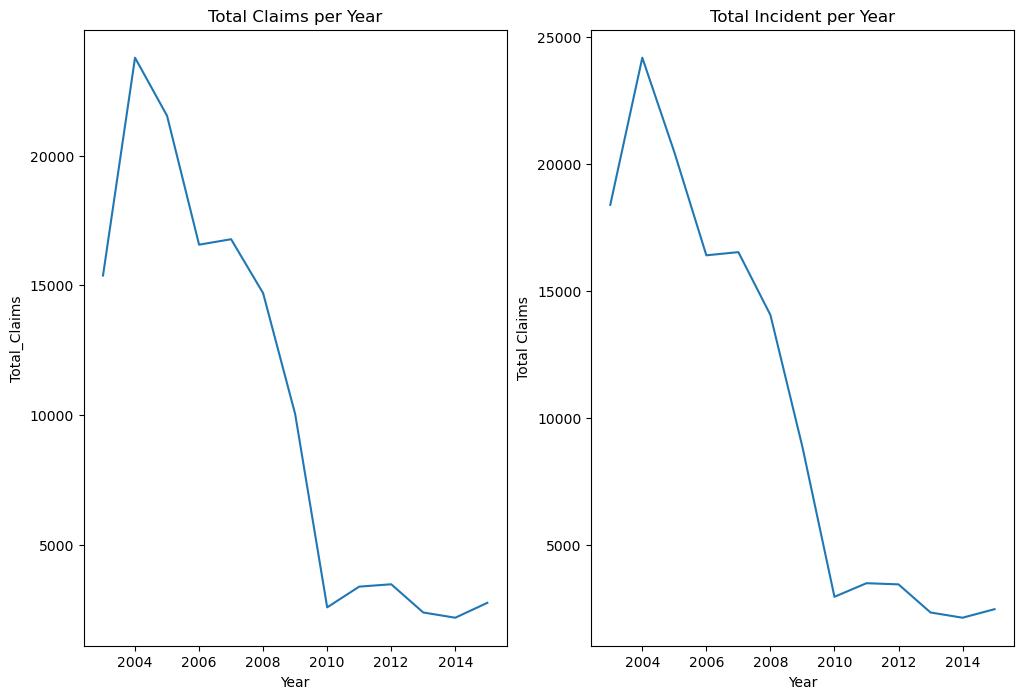

In [94]:
figure,axis=plt.subplots(1,2,figsize=(12,8))

# Group the data by year and calculate the total number of claims
df_yearly_received = df.groupby(df['Date_Received'].dt.year)['Claim_Number'].count().reset_index(name='Total_Claims')
df_yearly_incident = df.groupby(df['Incident_Date'].dt.year)['Claim_Number'].count().reset_index(name='Total_Claims')

# Plot the line plot using seaborn
sns.lineplot(x='Date_Received', y='Total_Claims', data=df_yearly_received, ax=axis[0]).set_title('Total Claims per Year')
sns.lineplot(x='Incident_Date', y='Total_Claims', data=df_yearly_incident, ax=axis[1]).set_title('Total Incident per Year')

# Add the title and labels for the x and y axis
axis[0].set_xlabel("Year")
axis[1].set_xlabel("Year")
plt.ylabel("Total Claims")

# Show the plot
plt.show()


Dari grafik diatas terlihat bahwa, kedua grafik menunjukkan kesamaan dimana puncak tertinggi terjadi nya pengajuan klaim terjadi pada tahun 2004. Dan dari grafik ini juga dapat ditarik kesimpulan bahwa terjadi penurunan pengajuan klaim dari tahun 2004 hingga ke tahun 2009, namun pada tahun 2010 terjadi peningkatan namun tidak signifikan jiga dibandingkan dengan jumlah total claim dari tahun tahun sebelumnya.

Dengan demikian, dapat ditarik sebuah asumsi bahwa, pada awal tahun TSA beroperasi yakni pada tahun 2002-2004 terjadi pengajuan klaim yang cukup banyak hal ini dikarenakan masih kurangnya SDM yang berkualitas dalam melakukan operasi tersebut, sehingga mereka melakukan evaluasi dengan terus meningkatkan kinerja nya.

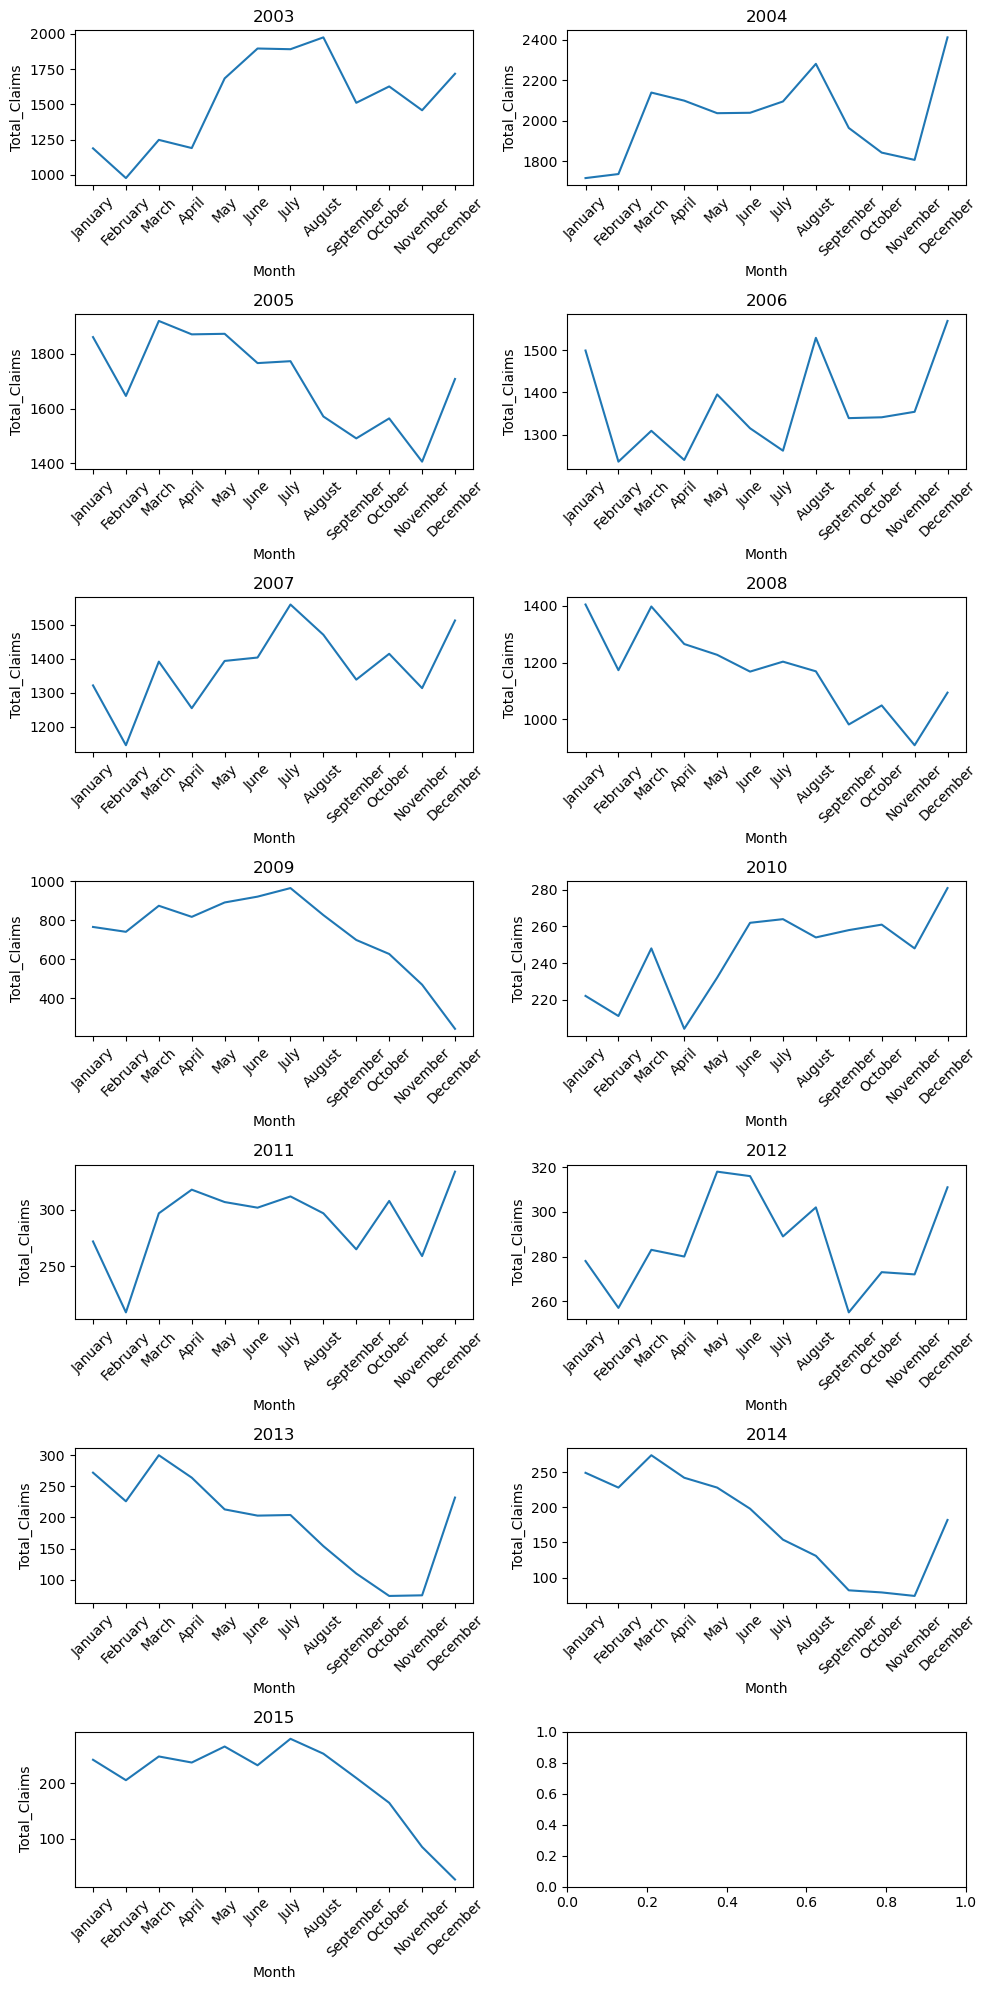

In [95]:
import calendar
# extract the month and year from the "Claim Date" column
df['Year'] = df['Incident_Date'].dt.year
df['Month'] = df['Incident_Date'].dt.month

# group the data by year and month
grouped = df.groupby(['Year', 'Month'], as_index=False).count()

# pivot the data to have year as columns and month as index
grouped = grouped.pivot(index='Month', columns='Year', values='Incident_Date')

# create a subplot for each year
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10, 20), squeeze=False)
for i, year in enumerate(grouped.columns):
    sns.lineplot(data=grouped[year], ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(str(year))
    ax[i//2,i%2].set_xticks(range(1, 13))
    ax[i//2,i%2].set_xticklabels(calendar.month_name[1:13], rotation=45)
    ax[i//2,i%2].set_xlabel("Month")
    ax[i//2,i%2].set_ylabel("Total_Claims")

plt.tight_layout()
plt.show()

Jika berdasarkan bulan, pengajuan claim tiap tahunnya cukup bervariasi. 

In [96]:
# Define the season categories
seasons = {
11: 'Low',
12: 'Low',
1: 'Low',
2: 'Low',
3: 'Low',
4: 'Shoulder',
5: 'Shoulder',
6: 'Shoulder',
9: 'Shoulder',
10: 'Shoulder',
7: 'High',
8: 'High'
}

# Extract the month from the "Incident Date" column
df['Month'] = df['Incident_Date'].dt.month

# Create the 'Season' column using the dictionary of seasons
df['Season'] = df['Month'].map(seasons)

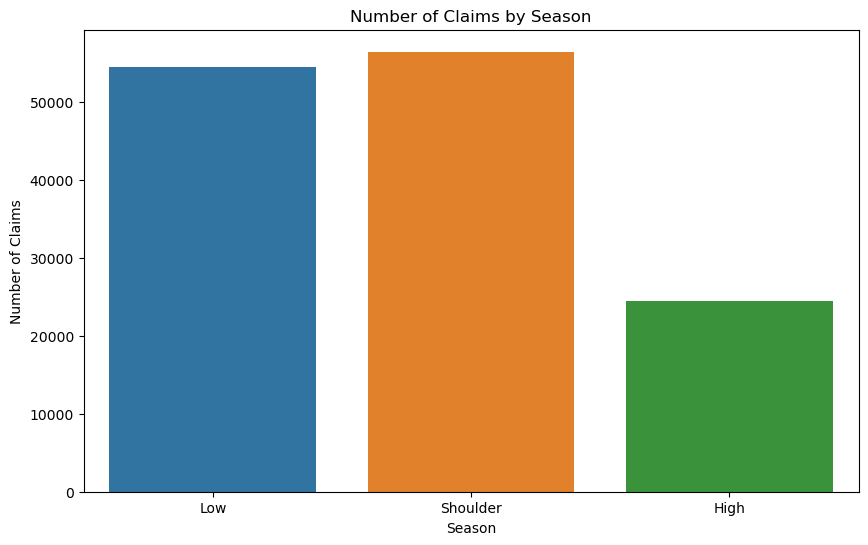

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x='Season', data=df)
plt.xlabel("Season")
plt.ylabel("Number of Claims")
plt.title("Number of Claims by Season")
plt.show()

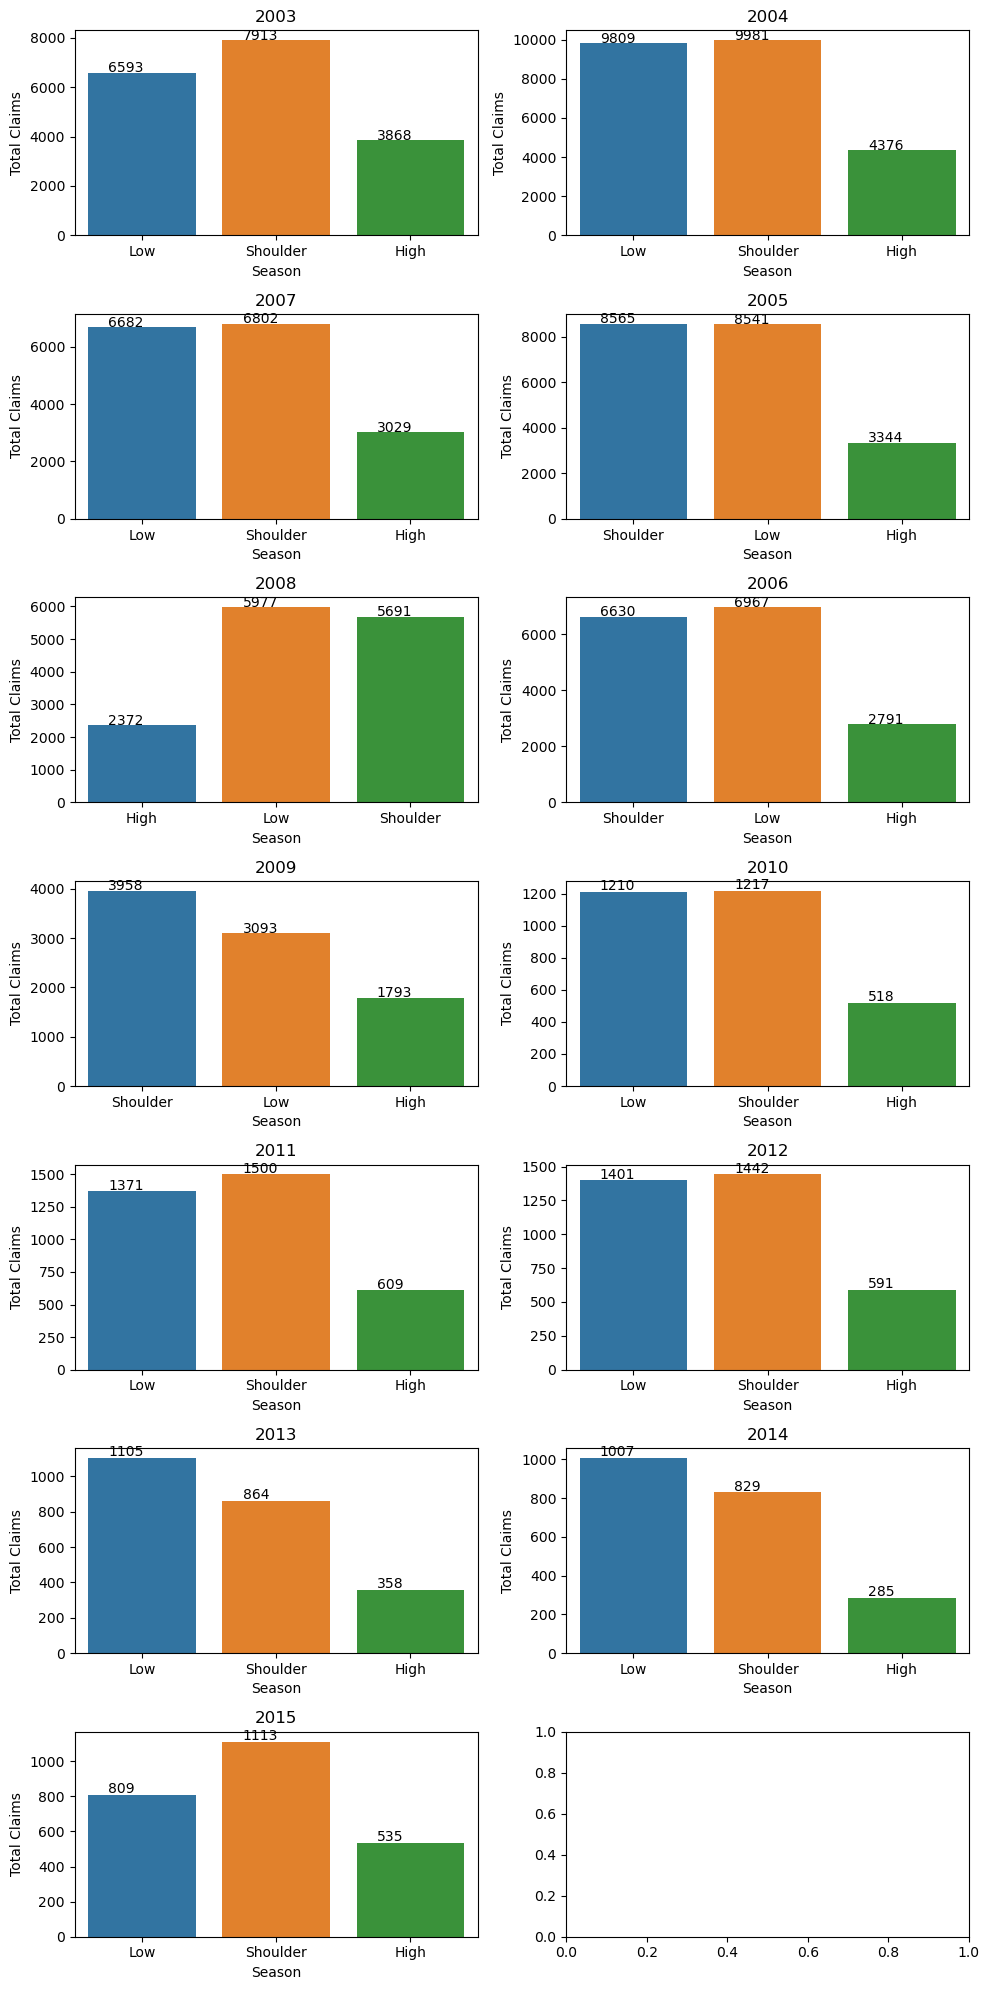

In [98]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20), squeeze=False)
for i, year in enumerate(df['Year'].unique()):
    year_df = df[df['Year'] == year]
    ax[i//2, i%2] = sns.countplot(x='Season', data=year_df, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(str(year))
    ax[i//2, i%2].set_xlabel("Season")
    ax[i//2, i%2].set_ylabel("Total Claims")
    for p in ax[i//2, i%2].patches:
        ax[i//2, i%2].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))

plt.tight_layout()
plt.show()

### Apa Status klaim terbanyak?

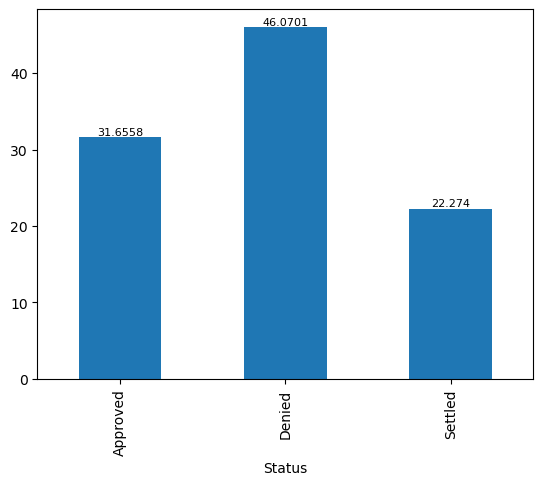

In [122]:
claim_counts = df.groupby('Status')['Claim_Number'].count()
normalized_claims = claim_counts/claim_counts.sum()*100
ax = normalized_claims.plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, fontsize=8)


Text(0.5, 1.0, 'Proportion Status Claim by Item Category')

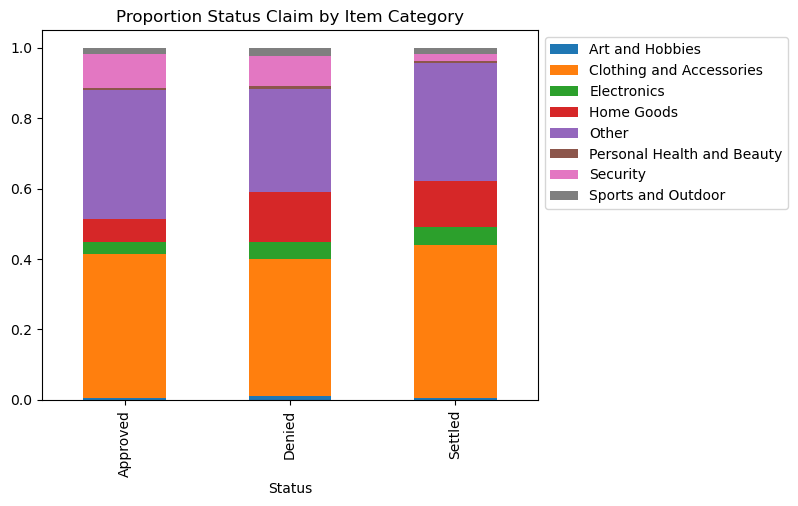

In [123]:
ct = pd.crosstab(df['Status'], df['Item_Category'], normalize='index')
ct.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Proportion Status Claim by Item Category')

Terlihat bahwa berdasarkan Status, pengajuan paling banyak di tolak / Denied sebanyak 46% diikuti oleh persetujuan / Approved sebesar 31.65% dan Settled sebesar 22%. Dari data tersebut dapat disimpulkan bahwa TSA melakukan pemilihan yang cukup selektif sehingga tidak semua pengajuan dapat di klaim 100%.

Dari ketiga Status tersebut juga dapat disimpulkan bahwa item category yang mendominasi adalah Clothing and Accesories dan juga Other lalu diikuti oleh Home Goods dan Security.

### Apa Claim Type terbanyak?

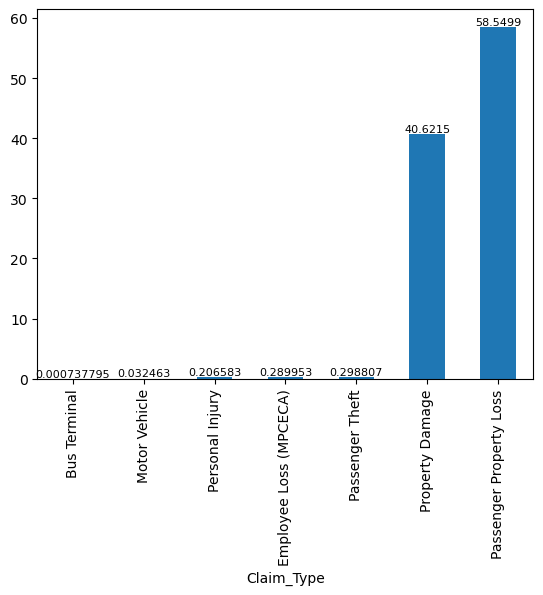

In [101]:
type_counts = df.groupby('Claim_Type')['Claim_Number'].count().sort_values()
normalized_claims = type_counts/type_counts.sum()*100
ax = normalized_claims.plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, fontsize=8)

Text(0, 0.5, 'Count')

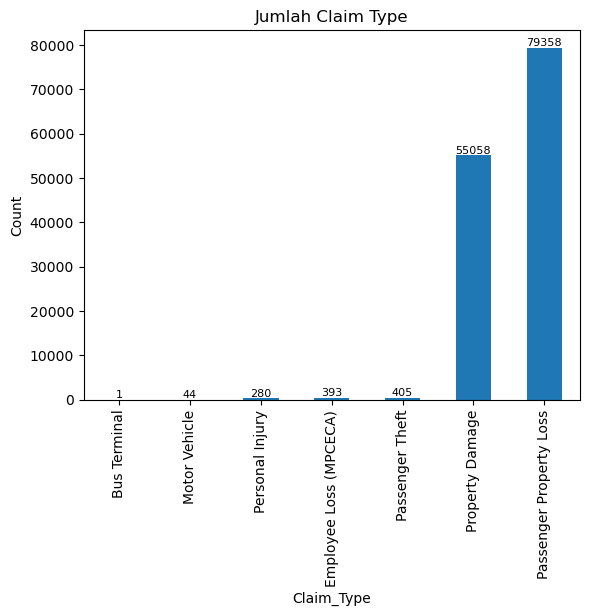

In [102]:
ax = df.groupby('Claim_Type')['Claim_Number'].count().sort_values().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, fontsize=8)

plt.title('Jumlah Claim Type')
plt.ylabel('Count')

Dari data diatas terlihat bahwa claim type didominasi oleh property loss sebesar 58% dan juga Property Damage sebesar 40%. Dengan demikian TSA dapat memberikan perhatian lebih terhadap faktor faktor yang menyebabkan pengajuan claim sehingga dapat meminimalisisr terjadinya pengajuan claim.

### Dimana lokasi claim terbanyak?

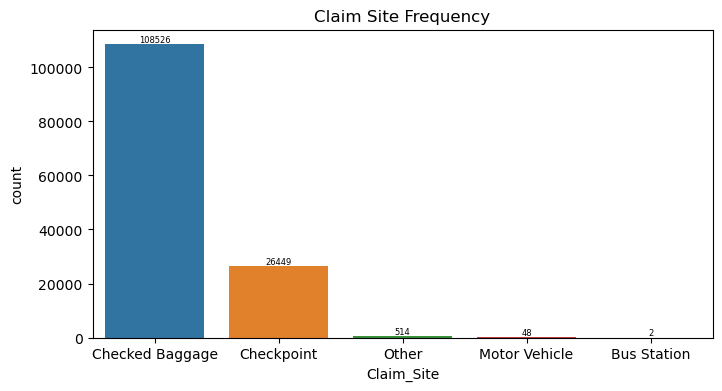

In [103]:
plt.figure(figsize=(8,4),dpi=100)
plt.title('Claim Site Frequency')
ax = sns.countplot(data=df, x=df['Claim_Site'], order = df['Claim_Site'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i, fontsize=6)

Checked Bagage dan Checkpoint merupakan lokasi yang paling sering menjadi tempat insiden, kedua lokasi ini memang berhubungan dengan petugas TSA, sehingga dapat dikatakan bahwa lokasi tersebut dapat saja terjadi insiden karena pada saat pengecekan barang para petugas tidak bekerja dengan baik dan dapat menyebabkan terjadinya kerusakan pada barang-barang penumpang.

### Airport mana yang menyumbangkan pengajuan claim terbanyak?

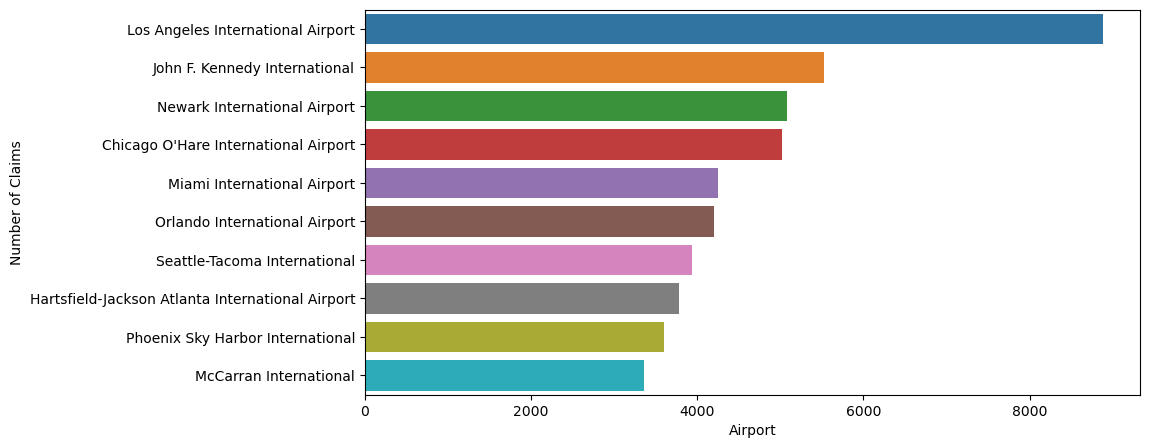

In [104]:
# count the number of claims at each airport
airport_counts = df['Airport_Name'].value_counts()

# select the top 5 airports
top_10_airports = airport_counts[:10].index

# create a subplot
fig, ax = plt.subplots(figsize=(10,5))

# plot the bar plot of the top 5 airports
sns.barplot(x=airport_counts[:10], y=top_10_airports, ax=ax)


# add labels to the x and y axes
ax.set_xlabel('Airport')
ax.set_ylabel('Number of Claims')

# show the plot
plt.show()

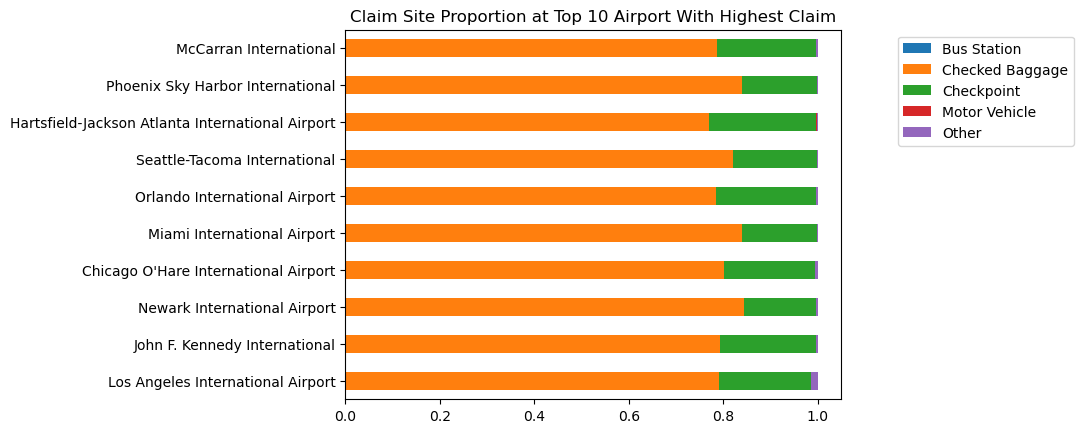

In [105]:
top_airport = df['Airport_Name'].value_counts().iloc[:10].index
ct = pd.crosstab(df['Airport_Name'],df['Claim_Site'], normalize='index')
ct_top_airport = ct.loc[top_airport]
ct_top_airport.plot(kind='barh', stacked=True)
plt.title('Claim Site Proportion at Top 10 Airport With Highest Claim')
plt.legend(bbox_to_anchor=(1.1, 1))

Berdasarkan data https://www.bts.gov/content/passengers-boarded-top-50-us-airports , didapatkan bahwa setidaknya 5 dari 10 airport dengan pengajuan claim yang tinggi berasal dari airport yang sangat sibuk di USA, sehingga dengan demikian hal ini memungkinkan terjadi nya klaim.

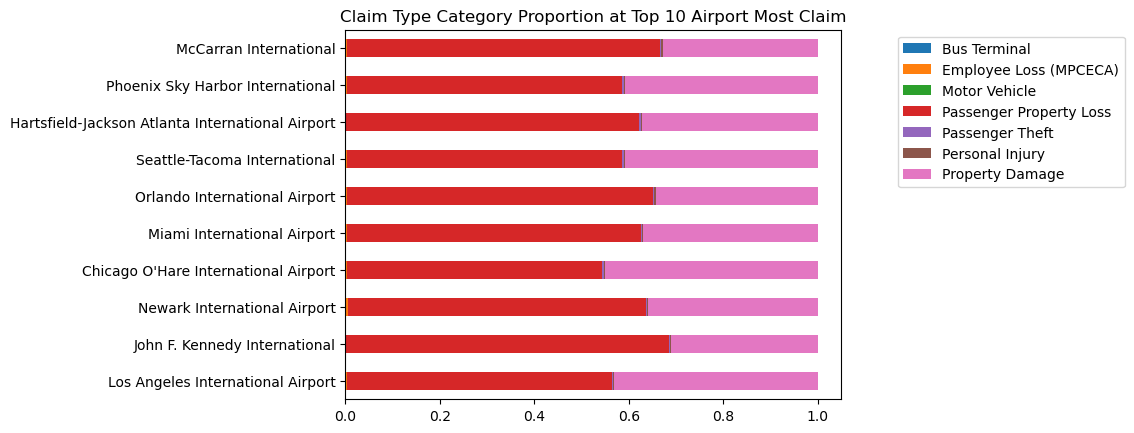

In [119]:
top_10_airport = df['Airport_Name'].value_counts().iloc[:10].index
tab = pd.crosstab(df['Airport_Name'],df['Claim_Type'], normalize='index')
viz = tab.loc[top_10_airport]
viz.plot(kind='barh', stacked=True)
plt.title('Claim Type Category Proportion at Top 10 Airport Most Claim')
plt.legend(bbox_to_anchor=(1.1, 1));

### Airline apa yang menyumbang pengajuan claim tertinggi?

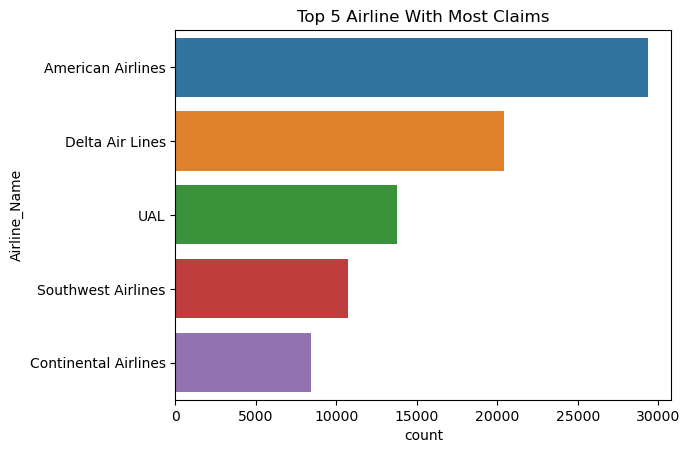

In [120]:
plt.title('Top 5 Airline With Most Claims')
sns.countplot(data=df, y=df['Airline_Name'], order = df['Airline_Name'].value_counts().iloc[:5].index);

Berdasarkan wikipedia https://en.wikipedia.org/wiki/List_of_largest_airlines_in_North_America , top 5 airline merupakan airline dengan tingkat penumpang tertinggi di Amerika Serikat.

### Bagaimana persebaran Claim Amount dan Close Amount?

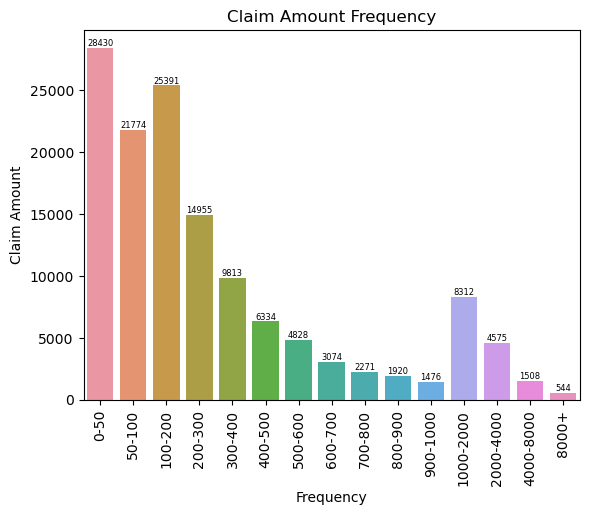

In [107]:
# Create bins for the "Claim Amount" column
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 4000, 8000, 16000]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-2000', '2000-4000', '4000-8000', '8000+']
df['Claim_Amount_Bins'] = pd.cut(df['Claim_Amount'], bins=bins, labels=labels, right=False)
# df
# Check the result
# print(df['Claim_Amount_Bins'].value_counts())


Claim_Amount_Bins = df['Claim_Amount_Bins'].value_counts().reset_index().sort_values('Claim_Amount_Bins', ascending=False)
ax = sns.barplot(data=Claim_Amount_Bins, x='index', y='Claim_Amount_Bins')

for i in ax.containers:
    ax.bar_label(i, fontsize=6)
    
plt.xticks(rotation=90)
plt.title('Claim Amount Frequency')
plt.ylabel('Claim Amount')
plt.xlabel('Frequency')

plt.show()

# ax = sns.countplot(data=df, x=df['Claim_Site'], order = df['Claim_Site'].value_counts().index)
# for i in ax.containers:
#     ax.bar_label(i, fontsize=6)

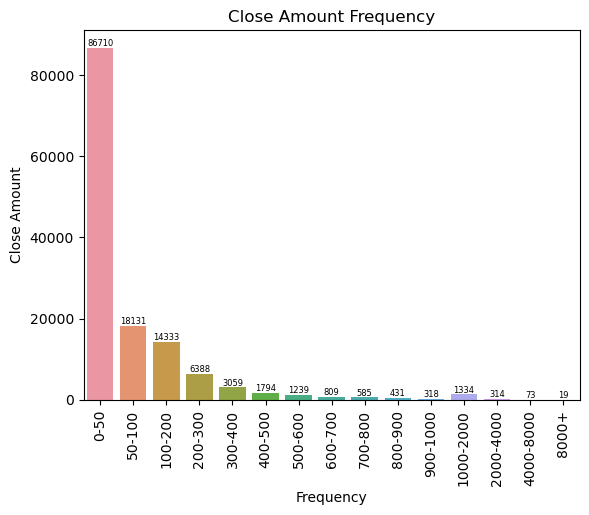

In [108]:
# Create bins for the "Claim Amount" column
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 4000, 8000, 16000]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-2000', '2000-4000', '4000-8000', '8000+']
df['Close_Amount_Bins'] = pd.cut(df['Close_Amount'], bins=bins, labels=labels, right=False)
# df
# Check the result
# print(df['Close_Amount_Bins'].value_counts())


Close_Amount_Bins = df['Close_Amount_Bins'].value_counts().reset_index().sort_values('Close_Amount_Bins', ascending=False)
ax = sns.barplot(data=Close_Amount_Bins, x='index', y='Close_Amount_Bins')

for i in ax.containers:
    ax.bar_label(i, fontsize=6)
    
plt.xticks(rotation=90)
plt.title('Close Amount Frequency')
plt.ylabel('Close Amount')
plt.xlabel('Frequency')
plt.show()

# ax = sns.countplot(data=df, x=df['Claim_Site'], order = df['Claim_Site'].value_counts().index)
# for i in ax.containers:
#     ax.bar_label(i, fontsize=6)

Dari kedua grafik diatas dapat disimpulkan bahwa semakin besar tingkat claim amount yang diajukan semakin kecil juga probabilitas untuk disetujui.

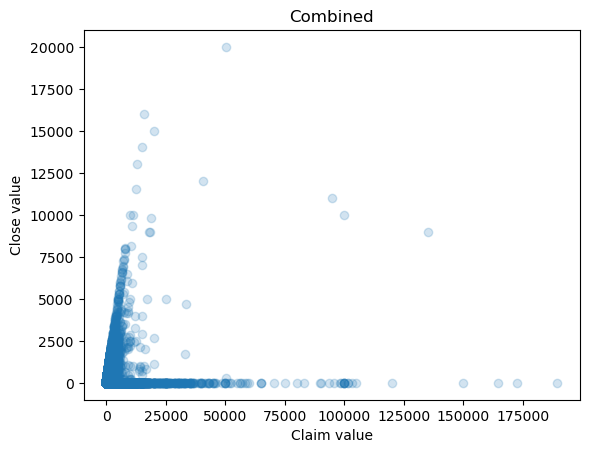

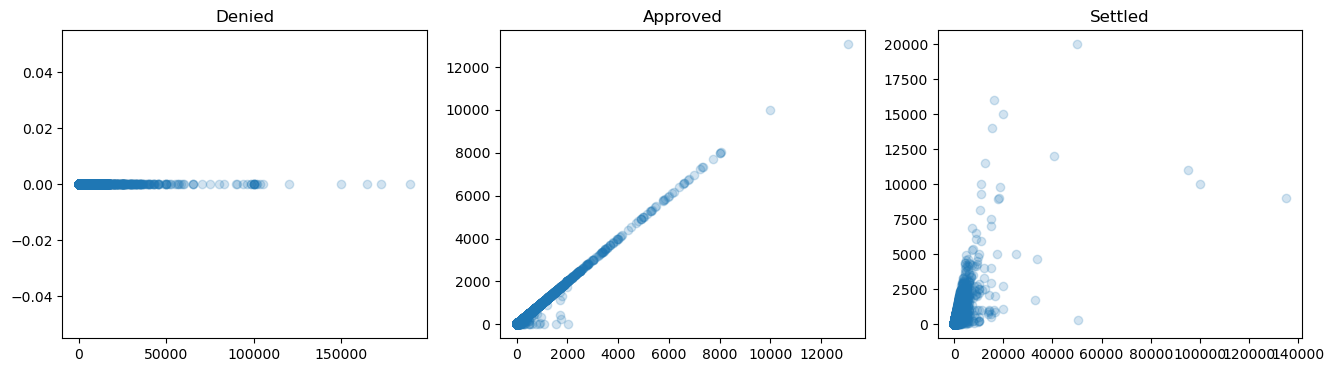

In [110]:
plot_df = df[(df.Claim_Amount < 200000) & (df.Close_Amount <= 500000)]

plt.scatter(plot_df.Claim_Amount,plot_df.Close_Amount,alpha=.2)
plt.title("Combined")
plt.xlabel("Claim value")
plt.ylabel("Close value")
plt.show()

fig,ax = plt.subplots(1,3)
fig.set_size_inches(16,4)

for i,s in enumerate(plot_df.Status.unique()):
    ax[i].scatter(plot_df[plot_df.Status==s].Claim_Amount,plot_df[plot_df.Status==s].Close_Amount,alpha=.2)
    ax[i].set_title(s)

# Kesimpulan

1. Berdasarkan hasil analisis terhadap trend data pada periode 2003-2015 didapatkan bahwa pada awal pengoperasion / ditetapkannya kebijakan TSA, terjadi peningkatan pengajuan klaim yang dilakukan penumpang pesawat hingga puncaknya di tahun 2004, namun pada tahun-tahun berikutnya total pengajuan klaim mengalami penurunan hingga tahun 2010. Dan pada tahun 2011 terjadi peningkatan namun tidak signifikan sehingga masih diwajarkan.
2. TSA cukup Selektif dalam menentukan Claim yang diajukan penumpang, berdasarkan hasil analisis didapatkan bahwa klaim paling banyak di tolak / Denied sebanyak 46% diikuti oleh persetujuan / Approved sebesar 31.65% dan Settled sebesar 22%. Hal ini dapat terjadi karena beberapa faktor diantaranya, nilai claim yang terlalu tinggi hingga kurangnya informasi terhadap pengajuan.
3. Berdasarkan Status dapat disimpulkan bahwa item category yang mendominasi adalah Clothing and Accesories dan juga Other lalu diikuti oleh Home Goods dan Security.
4. Top 3 Airport dengan penyumbang klaim tertinggi adalah LA International, JFK, dan Newark International Airport. Pengajuan klaim tertinggi mayoritas disumbang oleh airport dengan tingkat kesibukan yang tinggi. Sehingga hal ini dapat memungkinkan terjadi nya hal-hal yang tidak di inginkan.
5. Checked Bagage dan Checkpoint merupakan lokasi yang paling sering menjadi tempat insiden, sehingga sangat memungkinkan tiap insiden diakibatkan oleh staff dari TSA, sehingga perlu pengawasan yang lebih ketat lagi dalam pelaksanaan operasi TSA.
6. property loss sebesar 58% dan juga Property Damage sebesar 40% Berdasarkan tipe klaim yang diajukan, didapatkan bahwa property loss dan property damage mendominasi pengajuan klaim sekitar 58% dan 40% dari total pengajuan klaim.
7. Semakin tinggi nilai klaim yang diajukan ke TSA, proses pengajuan klaim akan semakin selektif.

# Rekomendasi

1. Untuk mengurangi terjadinya peningkatan klaim pada TSA, maka perlu dilakukan peningkatan terhadap kinerja dari seluruh Staff dengan melakukan training terhadap seluruh staff agar sesuai dengan SOP dan meminimalisir terjadinya kesalahan.
2. TSA perlu untuk menambah jumlah staff pada lokasi-lokasi dengan tingkat kesibukan bandara yang tinggi, hal ini dilakukan untuk mencegah terjadi nya kehilangan barang/kerusakan barang yang diakibatkan kelengahan dari para staff TSA.
3. Perlu adanya kolaborasi terhadap maskapai pesawat, karena banyaknya pengajuan claim pada lokasi-lokasi yang berhubungan dengan maskapai maupun pihak TSA dengan cara memperketat aturan untuk berhati-hati dalam mengelola barang penumpang, sehingga dapat meminimalisir terjadinya pengajuan klaim.




https://public.tableau.com/app/profile/rafi5071/viz/Capstone-2_16760326773060/Story1?publish=yes